In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 加载数据
df = pd.read_csv("/Users/lifangyi/Desktop/UOB/data_clean.csv", sep='\t')
encoded_df = pd.read_csv('CDR3_encoded.csv')

# 将one-hot编码的cdr3序列转换回numpy数组
cdr3_encoded = np.array([np.fromstring(seq, dtype=int, sep=' ') for seq in encoded_df['cdr3encode']])

# 使用LabelEncoder对antigen.epitope进行标签编码
label_encoder = LabelEncoder()
epitope_encoded = label_encoder.fit_transform(df['antigen.epitope'])

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(cdr3_encoded, epitope_encoded, test_size=0.2, random_state=42)

# 创建随机森林模型
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
clf.fit(X_train, y_train)

# 预测测试集
y_pred = clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


In [1]:
###对cdr3进行one-hot编码，对epitope进行label编码

from sklearn.preprocessing import LabelEncoder

# 首先导入相关库
import pandas as pd
import numpy as np

# 加载数据
df = pd.read_csv("/Users/lifangyi/Desktop/data_clean_small.csv", sep='\t')
cdr3_sequences = df['cdr3'].tolist()

# 创建氨基酸的one-hot编码字典
amino_acids = set(''.join(cdr3_sequences))
amino_acid_to_index = {aa: i for i, aa in enumerate(sorted(amino_acids))}

# 准备编码函数
def encode_sequence(seq, max_length, encoding_dict):
    encoded = np.zeros((max_length, len(encoding_dict)), dtype=int)
    for i, amino_acid in enumerate(seq):
        if amino_acid in encoding_dict:
            encoded[i, encoding_dict[amino_acid]] = 1
    return encoded.flatten()

# 计算最大长度
max_length_cdr3 = max(len(seq) for seq in cdr3_sequences)

# 对cdr3序列进行one-hot编码
cdr3_encoded = np.array([encode_sequence(seq, max_length_cdr3, amino_acid_to_index) for seq in cdr3_sequences])

# 使用LabelEncoder对antigen.epitope进行标签编码
label_encoder = LabelEncoder()
epitope_encoded = label_encoder.fit_transform(df['antigen.epitope'])

# 将cdr3序列的one-hot编码转换为字符串形式存储
cdr3_encoded_strings = [' '.join(map(str, seq)) for seq in cdr3_encoded]

# 将标签编码后的epitope直接作为整数数组使用
# 注意：不需要转换为字符串，因为我们已经将每个epitope映射到一个唯一的整数

# 将结果写入新的DataFrame
encoded_df = pd.DataFrame({
    'cdr3encode': cdr3_encoded_strings,
    'epitopeencode': epitope_encoded  # 直接使用整数数组
})

# 保存到CSV文件
encoded_df.to_csv('CDR3_encoded2.csv', index=False)


KeyError: 'cdr3'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# 加载重新编码后的数据
encoded_df = pd.read_csv('CDR3_encoded.csv')

# cdr3序列的one-hot编码转换回numpy数组
cdr3_encoded = np.array([np.fromstring(seq, dtype=int, sep=' ') for seq in encoded_df['cdr3encode']])

# epitope标签已经是整数编码，直接使用
epitope_encoded = encoded_df['epitopeencode'].values

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(cdr3_encoded, epitope_encoded, test_size=0.2, random_state=42)

# 创建随机森林模型
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
clf.fit(X_train, y_train)

# 预测测试集
y_pred = clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


In [2]:
###对cdr3进行one-hot编码，对epitope进行label编码

from sklearn.preprocessing import LabelEncoder

# 首先导入相关库
import pandas as pd
import numpy as np

# 加载数据
df = pd.read_csv("/Users/lifangyi/Desktop/data_clean_small.csv", sep='\t')
cdr3_sequences = df['cdr3_b_aa'].tolist()

# 创建氨基酸的one-hot编码字典
amino_acids = set(''.join(cdr3_sequences))
amino_acid_to_index = {aa: i for i, aa in enumerate(sorted(amino_acids))}

# 准备编码函数
def encode_sequence(seq, max_length, encoding_dict):
    encoded = np.zeros((max_length, len(encoding_dict)), dtype=int)
    for i, amino_acid in enumerate(seq):
        if amino_acid in encoding_dict:
            encoded[i, encoding_dict[amino_acid]] = 1
    return encoded.flatten()

# 计算最大长度
max_length_cdr3 = max(len(seq) for seq in cdr3_sequences)

# 对cdr3序列进行one-hot编码
cdr3_encoded = np.array([encode_sequence(seq, max_length_cdr3, amino_acid_to_index) for seq in cdr3_sequences])

# 使用LabelEncoder对antigen.epitope进行标签编码
label_encoder = LabelEncoder()
epitope_encoded = label_encoder.fit_transform(df['antigen.epitope'])

# 将cdr3序列的one-hot编码转换为字符串形式存储
cdr3_encoded_strings = [' '.join(map(str, seq)) for seq in cdr3_encoded]

# 将标签编码后的epitope直接作为整数数组使用
# 注意：不需要转换为字符串，因为我们已经将每个epitope映射到一个唯一的整数

# 将结果写入新的DataFrame
encoded_df = pd.DataFrame({
    'cdr3encode': cdr3_encoded_strings,
    'epitopeencode': epitope_encoded  # 直接使用整数数组
})

# 保存到CSV文件
encoded_df.to_csv('CDR3_encoded5.csv', index=False)


In [3]:
###对cdr3进行one-hot编码，对epitope进行label编码

from sklearn.preprocessing import LabelEncoder

# 首先导入相关库
import pandas as pd
import numpy as np

# 加载数据
df = pd.read_csv("/Users/lifangyi/Desktop/data_clean_large.csv", sep='\t')
cdr3_sequences = df['cdr3_b_aa'].tolist()

# 创建氨基酸的one-hot编码字典
amino_acids = set(''.join(cdr3_sequences))
amino_acid_to_index = {aa: i for i, aa in enumerate(sorted(amino_acids))}

# 准备编码函数
def encode_sequence(seq, max_length, encoding_dict):
    encoded = np.zeros((max_length, len(encoding_dict)), dtype=int)
    for i, amino_acid in enumerate(seq):
        if amino_acid in encoding_dict:
            encoded[i, encoding_dict[amino_acid]] = 1
    return encoded.flatten()

# 计算最大长度
max_length_cdr3 = max(len(seq) for seq in cdr3_sequences)

# 对cdr3序列进行one-hot编码
cdr3_encoded = np.array([encode_sequence(seq, max_length_cdr3, amino_acid_to_index) for seq in cdr3_sequences])

# 使用LabelEncoder对antigen.epitope进行标签编码
label_encoder = LabelEncoder()
epitope_encoded = label_encoder.fit_transform(df['antigen.epitope'])

# 将cdr3序列的one-hot编码转换为字符串形式存储
cdr3_encoded_strings = [' '.join(map(str, seq)) for seq in cdr3_encoded]

# 将标签编码后的epitope直接作为整数数组使用
# 注意：不需要转换为字符串，因为我们已经将每个epitope映射到一个唯一的整数

# 将结果写入新的DataFrame
encoded_df = pd.DataFrame({
    'cdr3encode': cdr3_encoded_strings,
    'epitopeencode': epitope_encoded  # 直接使用整数数组
})

# 保存到CSV文件
encoded_df.to_csv('CDR3_encoded6.csv', index=False)


In [ ]:
###kmer
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from collections import Counter

# 加载数据
df = pd.read_csv("/Users/lifangyi/Desktop/UOB/mini/data_clean_large.csv", sep='\t')

# 创建标签编码器实例
label_encoder = LabelEncoder()

# 定义用于编码的列（包括基因和epitope）
genes_columns = ['v_b_gene', 'j_b_gene', 'v_a_gene', 'j_a_gene', 'antigen.epitope']

# 对基因列和epitope进行标签编码
for column in genes_columns:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])

# k-mer生成函数
def generate_kmers(sequence, k):
    return [sequence[i:i+k] for i in range(len(sequence) - k + 1)]

# 计算k-mer频率
def kmer_frequency(sequences, k):
    kmer_counts = []
    all_kmers = set()
    for seq in sequences.dropna():
        counts = Counter(generate_kmers(seq, k))
        kmer_counts.append(counts)
        all_kmers.update(counts.keys())
    all_kmers = sorted(all_kmers)
    # 创建特征矩阵
    feature_matrix = np.zeros((len(kmer_counts), len(all_kmers)))
    for i, counts in enumerate(kmer_counts):
        feature_matrix[i] = [counts[kmer] for kmer in all_kmers]
    return feature_matrix, all_kmers

# 应用k-mer编码
k = 3  # 选择一个k值
cdr3_a_kmers, a_kmers = kmer_frequency(df['cdr3_a_aa'], k)
cdr3_b_kmers, b_kmers = kmer_frequency(df['cdr3_b_aa'], k)

# 转换为DataFrame以保存结果
kmer_columns_a = ['kmer_a_' + kmer for kmer in a_kmers]
kmer_columns_b = ['kmer_b_' + kmer for kmer in b_kmers]
df_kmer_a = pd.DataFrame(cdr3_a_kmers, columns=kmer_columns_a)
df_kmer_b = pd.DataFrame(cdr3_b_kmers, columns=kmer_columns_b)

# 合并数据框
encoded_df = pd.concat([df.reset_index(drop=True), df_kmer_a, df_kmer_b], axis=1)

# 保存到CSV文件
encoded_df.to_csv('CDR3_kmer_encoded_complete.csv', index=False)



In [22]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# 加载并准备数据
df_encoded = pd.read_csv('CDR3_kmer_encoded_complete.csv')
kmer_columns = [col for col in df_encoded.columns if col.startswith('kmer_a_') or col.startswith('kmer_b_')]
X = df_encoded[kmer_columns].fillna(0).values

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 使用DBSCAN进行聚类
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps和min_samples需要根据数据进行调整
clusters = dbscan.fit_predict(X_scaled)

# 由于DBSCAN可能会产生噪声点（标记为-1），在计算Silhouette Score时应排除这些点
mask = clusters != -1
if np.sum(mask) > 1:  # 确保至少有两个非噪声点
    silhouette_avg = silhouette_score(X_scaled[mask], clusters[mask])
    print(f'Silhouette Score: {silhouette_avg:.2f}')
else:
    print("Not enough clusters to compute Silhouette Score.")


Silhouette Score: 1.00


In [7]:
###最终编码对假集
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# 加载数据
df = pd.read_csv("/Users/lifangyi/Desktop/UOB/mini/data_clean_score_4.csv",sep='\t')

# 创建一个通用的标签编码器实例用于peptide列
label_encoder = LabelEncoder()

# 对peptide进行标签编码
df['epitope_encoded'] = label_encoder.fit_transform(df['antigen.epitope'])

# 创建氨基酸的one-hot编码字典
amino_acids = set(''.join(df['cdr3_a_aa'].dropna()) + ''.join(df['cdr3_b_aa'].dropna()))
amino_acid_to_index = {aa: i for i, aa in enumerate(sorted(amino_acids))}

# 准备编码函数
def encode_sequence(seq, max_length, encoding_dict):
    encoded = np.zeros((max_length, len(encoding_dict)), dtype=int)
    for i, amino_acid in enumerate(seq):
        if amino_acid in encoding_dict:
            encoded[i, encoding_dict[amino_acid]] = 1
    return encoded.flatten()

# 计算最大长度
max_length_cdr3_a = max(len(seq) for seq in df['cdr3_a_aa'].dropna())
max_length_cdr3_b = max(len(seq) for seq in df['cdr3_b_aa'].dropna())
print(max_length_cdr3_a)
print(max_length_cdr3_b)
# 对 CDR3a 和 CDR3b 序列进行 one-hot 编码
df['CDR3a_encoded'] = [encode_sequence(seq, max_length_cdr3_a, amino_acid_to_index) for seq in df['cdr3_a_aa'].dropna()]
df['CDR3b_encoded'] = [encode_sequence(seq, max_length_cdr3_b, amino_acid_to_index) for seq in df['cdr3_b_aa'].dropna()]

# 将编码转换为字符串形式以便保存
df['CDR3a_encoded'] = [' '.join(map(str, seq)) for seq in df['CDR3a_encoded']]
df['CDR3b_encoded'] = [' '.join(map(str, seq)) for seq in df['CDR3b_encoded']]

# 构造最终输出的DataFrame，添加binder和mhc列
encoded_df = df[['CDR3a_encoded', 'CDR3b_encoded', 'epitope_encoded']]

# 保存到 CSV 文件
encoded_df.to_csv('CDR3_encoded_complete_final_score.csv', index=False)



19
21


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, average_precision_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, average_precision_score
data_path_prefix = "/Users/lifangyi/Desktop/data/"
unique_epitopes = ['KLGGALQAK', 'GILGFVFTL', 'AVFDRKSDAK', 'RAKFKQLL', 'IVTDFSVIK',
       'SSYRRPVGI', 'YLQPRTFLL', 'RLRAEAQVK', 'TFEYVSQPFLMDLE', 'SSLENFRAYV',
       'ELAGIGILTV', 'NLVPMVATV', 'TTDPSFLGRY', 'SPRWYFYYL', 'GLCTLVAML',
       'ASNENMETM', 'HGIRNASFI', 'LLWNGPMAV', 'CINGVCWTV', 'LSLRNPILV',
       'SSPPMFRV', 'LTDEMIAQY', 'ATDALMTGF', 'QYIKWPWYI', 'KTFPPTEPK',
       'KSKRTPMGF', 'DATYQRTRALVR', 'TVYGFCLL', 'NQKLIANQF', 'KAVYNFATC']

for epitope in unique_epitopes:

    train_path = data_path_prefix + epitope + "_train.csv"
    test_path = data_path_prefix + epitope + "_test.csv"

    df_train = pd.read_csv(train_path, sep='\t')
    df_test = pd.read_csv(test_path, sep='\t')


    # 创建氨基酸的one-hot编码字典
    amino_acids1 = set(''.join(df_train['cdr3_a_aa'].dropna()) + ''.join(df_train['cdr3_b_aa'].dropna()))
    amino_acids2 = set(''.join(df_test['cdr3_a_aa'].dropna()) + ''.join(df_test['cdr3_b_aa'].dropna()))
    amino_acid_to_index1 = {aa: i for i, aa in enumerate(sorted(amino_acids1))}
    amino_acid_to_index2 = {aa: i for i, aa in enumerate(sorted(amino_acids2))}

# 准备编码函数
    def encode_sequence(seq, max_length, encoding_dict):
        encoded = np.zeros((max_length, len(encoding_dict)), dtype=int)
        for i, amino_acid in enumerate(seq):
            if amino_acid in encoding_dict:
                encoded[i, encoding_dict[amino_acid]] = 1
        return encoded.flatten()

# 计算最大长度
    max_length_cdr3_a = max(len(seq) for seq in df_train['cdr3_a_aa'].dropna())
    max_length_cdr3_b = max(len(seq) for seq in df_train['cdr3_b_aa'].dropna())

    max_length_cdr3_a1 = max(len(seq) for seq in df_test['cdr3_a_aa'].dropna())
    max_length_cdr3_b1 = max(len(seq) for seq in df_test['cdr3_b_aa'].dropna())
    # print(max_length_cdr3_a)
    # print(max_length_cdr3_b)
# 对 CDR3a 和 CDR3b 序列进行 one-hot 编码
    df_train['CDR3a_encoded'] = [encode_sequence(seq, 26, amino_acid_to_index1) for seq in df_train['cdr3_a_aa'].dropna()]
    df_train['CDR3b_encoded'] = [encode_sequence(seq, 26, amino_acid_to_index1) for seq in df_train['cdr3_b_aa'].dropna()]

    df_test['CDR3a_encoded'] = [encode_sequence(seq, 26, amino_acid_to_index2) for seq in df_test['cdr3_a_aa'].dropna()]
    df_test['CDR3b_encoded'] = [encode_sequence(seq, 26, amino_acid_to_index2) for seq in df_test['cdr3_b_aa'].dropna()]

# 将编码转换为字符串形式以便保存
    df_train['CDR3a_encoded'] = [' '.join(map(str, seq)) for seq in df_train['CDR3a_encoded']]
    df_train['CDR3b_encoded'] = [' '.join(map(str, seq)) for seq in df_train['CDR3b_encoded']]

    df_test['CDR3a_encoded'] = [' '.join(map(str, seq)) for seq in df_test['CDR3a_encoded']]
    df_test['CDR3b_encoded'] = [' '.join(map(str, seq)) for seq in df_test['CDR3b_encoded']]
# 构造最终输出的DataFrame，添加binder和mhc列
    df_train = df_train[['CDR3a_encoded', 'CDR3b_encoded','binder']]
    df_test= df_test[['CDR3a_encoded', 'CDR3b_encoded','binder']]
# 保存到 CSV 文件
    # encoded_df.to_csv('CDR3_encoded_complete_final_score.csv', index=False)
    df_train['CDR3a_encoded'] = df_train['CDR3a_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
    df_train['CDR3b_encoded'] = df_train['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))

    df_test['CDR3a_encoded'] = df_test['CDR3a_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
    df_test['CDR3b_encoded'] = df_test['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
    # 合并CDR3a, CDR3b, MHC类 I 和类 II 编码
    X = np.hstack((
         np.vstack(df_train['CDR3a_encoded'].values),
         np.vstack(df_train['CDR3b_encoded'].values),
         #np.vstack(df_filtered['cluster'].values)
    #     # df_filtered['mhc_a_encoded'].values.reshape(-1, 1),
         # df_filtered['mhc_b_encoded'].values.reshape(-1, 1)
     ))

    print(X.shape)
    #X = np.vstack(df_filtered['CDR3b_encoded'].values)
    # 定义目标变量
    X_2 = np.hstack((
         np.vstack(df_test['CDR3a_encoded'].values),
         np.vstack(df_test['CDR3b_encoded'].values),
         #np.vstack(df_filtered['cluster'].values)
    #     # df_filtered['mhc_a_encoded'].values.reshape(-1, 1),
         # df_filtered['mhc_b_encoded'].values.reshape(-1, 1)
     ))
    print(X_2.shape)
    y = df_train['binder'].values
    z = df_test['binder'].values
    # 划分训练和测试数据集
    # X_train, X_test, y_train, y_test = train_test_split(X, y, X_2,z)
    X_train = X
    X_test = X_2
    y_train = y
    y_test = z
    # 初始化XGBoost模型
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
   # print("真实: ", y_test)
    # 训练模型
    model.fit(X_train, y_train)
    # 预测测试集
    y_pred = model.predict(X_test)
    #print("预测: ", y_pred)

    y_proba = model.predict_proba(X_test)[:, 1]  # 获取正类的预测概率用于ROC和平均精确度计算
    
    # 计算并打印各种评估指标
    accuracy = accuracy_score(y_test, y_pred)
    # f1 = f1_score(y_test, y_pred)
    precision, recall, f1, _  = precision_recall_fscore_support(y_test, y_pred,average='macro')
    try:
        roc_auc = roc_auc_score(y_test, y_proba)
    except ValueError as e:
        print(f"无法计算AUROC: {e}")
        roc_auc = None
    # roc_auc = roc_auc_score(y_test, y_proba)
    if roc_auc is not None:
        print(f"AUROC: {roc_auc}")

    # recall = recall_score(y_test, y_pred)
    try:
        average_precision = average_precision_score(y_test, y_proba)
    except ValueError as e:
        print(f"无法计算AUPRC: {e}")
        average_precision = None
    
    if average_precision is not None:
        print(f"average_precision: {average_precision}")

    # average_precision = average_precision_score(y_test, y_proba)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    #print(f"ROC AUC Score: {roc_auc:.2f}")
    print(f"Recall: {recall:.2f}")
    #print(f"Average Precision Score: {average_precision:.2f}")
    print(f"precision:{precision:.2f}")
    print("\n" + "-"*50 + "\n")


(65574, 1040)
(16398, 1040)
AUROC: 0.7288458245490299
average_precision: 0.31535831813190524
Accuracy: 0.82
F1 Score: 0.56
Recall: 0.55
precision:0.61

--------------------------------------------------

(8952, 1040)
(2238, 1040)
AUROC: 0.9211997498724206
average_precision: 0.8767080386043358
Accuracy: 0.95
F1 Score: 0.91
Recall: 0.88
precision:0.96

--------------------------------------------------

(8268, 1040)
(2070, 1040)
AUROC: 0.5918605335013652
average_precision: 0.22737133125328
Accuracy: 0.83
F1 Score: 0.50
Recall: 0.52
precision:0.59

--------------------------------------------------

(5790, 1040)
(1452, 1040)
AUROC: 0.8674885595246227
average_precision: 0.7759037012000808
Accuracy: 0.93
F1 Score: 0.85
Recall: 0.80
precision:0.92

--------------------------------------------------

(3420, 1040)
(858, 1040)
AUROC: 0.725541591275857
average_precision: 0.5855144851554268
Accuracy: 0.89
F1 Score: 0.74
Recall: 0.69
precision:0.86

------------------------------------------------

In [30]:
###最终编码对假集，带mhc
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# 加载数据
df = pd.read_csv("/Users/lifangyi/Desktop/UOB/mini/data_clean_large_neg.csv", sep='\t')

# 创建一个通用的标签编码器实例
label_encoder = LabelEncoder()

# 对peptide进行标签编码
df['epitope_encoded'] = label_encoder.fit_transform(df['antigen.epitope'])

# 对 MHC 类 I 和 MHC 类 II 进行标签编码
df['mhc_a_encoded'] = label_encoder.fit_transform(df['mhc.a'])
df['mhc_b_encoded'] = label_encoder.fit_transform(df['mhc.b'])

# 创建氨基酸的one-hot编码字典
amino_acids = set(''.join(df['cdr3_a_aa'].dropna()) + ''.join(df['cdr3_b_aa'].dropna()))
amino_acid_to_index = {aa: i for i, aa in enumerate(sorted(amino_acids))}

# 准备编码函数
def encode_sequence(seq, max_length, encoding_dict):
    encoded = np.zeros((max_length, len(encoding_dict)), dtype=int)
    for i, amino_acid in enumerate(seq):
        if amino_acid in encoding_dict:
            encoded[i, encoding_dict[amino_acid]] = 1
    return encoded.flatten()

# 计算最大长度
max_length_cdr3_a = max(len(seq) for seq in df['cdr3_a_aa'].dropna())
max_length_cdr3_b = max(len(seq) for seq in df['cdr3_b_aa'].dropna())

# 对 CDR3a 和 CDR3b 序列进行 one-hot 编码
df['CDR3a_encoded'] = [encode_sequence(seq, max_length_cdr3_a, amino_acid_to_index) for seq in df['cdr3_a_aa'].dropna()]
df['CDR3b_encoded'] = [encode_sequence(seq, max_length_cdr3_b, amino_acid_to_index) for seq in df['cdr3_b_aa'].dropna()]

# 将编码转换为字符串形式以便保存
df['CDR3a_encoded'] = [' '.join(map(str, seq)) for seq in df['CDR3a_encoded']]
df['CDR3b_encoded'] = [' '.join(map(str, seq)) for seq in df['CDR3b_encoded']]

# 构造最终输出的DataFrame，包括所有编码列和binder列
encoded_df = df[['CDR3a_encoded', 'CDR3b_encoded', 'epitope_encoded', 'antigen.epitope','mhc_a_encoded', 'mhc_b_encoded', 'binder']]

# 保存到 CSV 文件
encoded_df.to_csv('CDR3_encoded_complete_fake_small_mhc.csv', index=False)


In [120]:
###二分类编码kmer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# 加载数据
df = pd.read_csv("/Users/lifangyi/Desktop/VDJ_test_2.csv")

# 创建一个通用的标签编码器实例用于peptide列
label_encoder = LabelEncoder()

# 对peptide进行标签编码
df['peptide_encoded'] = label_encoder.fit_transform(df['peptide'])

# 定义k-mer大小
k = 2

# k-mer编码函数
def get_kmers(sequence, k):
    return [sequence[x:x+k] for x in range(len(sequence) - k + 1)]

# 将序列转换为k-mer序列
def encode_kmers(sequences, k):
    kmers = sequences.apply(lambda x: get_kmers(x, k))
    kmer_counts = kmers.apply(lambda x: ' '.join(x))
    return kmer_counts

# 应用k-mer编码到CDR3a和CDR3b
df['CDR3a_kmers'] = encode_kmers(df['CDR3a'].dropna(), k)
df['CDR3b_kmers'] = encode_kmers(df['CDR3b'].dropna(), k)

# 构造最终输出的DataFrame，添加binder和mhc列
encoded_df = df[['CDR3a_kmers', 'CDR3b_kmers', 'peptide_encoded', 'binder', 'MHC']]

# 保存到 CSV 文件
encoded_df.to_csv('CDR3_encoded_complete_fake_kmer2.csv', index=False)


In [43]:
# 打印所有列名
print(df.columns)

print('peptide' in df.columns)


Index([',CDR3b,CDR3a,peptide,MHC,binder'], dtype='object')
False


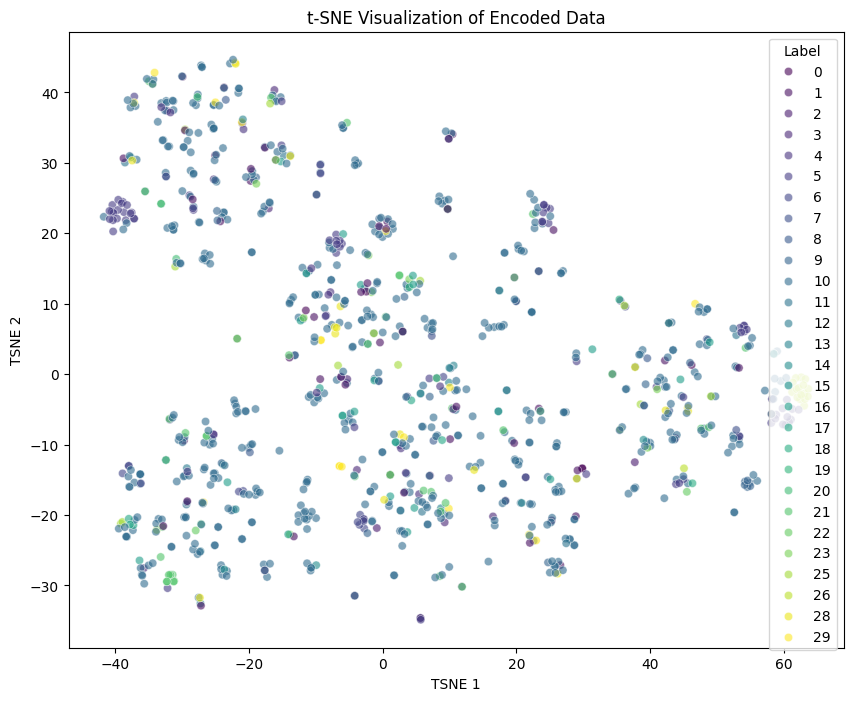

In [34]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 假设已经按照之前的步骤加载和准备好了数据
encoded_df = pd.read_csv('CDR3_encoded_complete.csv')

# 转换字符串序列为数值数组
def convert_encoded_sequence(row):
    return np.array(list(map(int, row.split())))

# 应用转换
encoded_df['cdr3_a_aa_encoded'] = encoded_df['cdr3_a_aa_encoded'].apply(convert_encoded_sequence)
encoded_df['cdr3_b_aa_encoded'] = encoded_df['cdr3_b_aa_encoded'].apply(convert_encoded_sequence)

# 如果cdr3_a_aa_encoded 和 cdr3_b_aa_encoded 需要结合使用，可以使用下面的方式：
# X = np.stack(encoded_df['cdr3_a_aa_encoded'].values + encoded_df['cdr3_b_aa_encoded'].values)

# 选择一个合适的样本大小，因为t-SNE计算成本较高
sample_df = encoded_df.sample(n=1000, random_state=42)  # 取样1000个样本进行可视化

# 分离特征和标签 - 这里只用一个编码特征进行示例
X = np.stack(sample_df['cdr3_a_aa_encoded'].values)  # 使用cdr3_a_aa_encoded作为特征
y = sample_df['antigen.epitope_encoded']  # 预测目标

# 使用t-SNE进行降维
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# 创建一个数据框包括t-SNE的两个维度和目标标签
tsne_df = pd.DataFrame({
    'TSNE 1': X_tsne[:, 0],
    'TSNE 2': X_tsne[:, 1],
    'Label': y
})

# 绘制t-SNE散点图
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE 1', y='TSNE 2', hue='Label', data=tsne_df, palette='viridis', legend='full', alpha=0.6)
plt.title('t-SNE Visualization of Encoded Data')
plt.show()


In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# 加载数据
encoded_df = pd.read_csv('CDR3_encoded_complete.csv')

# 函数：将存储为字符串的序列转换为NumPy数组
def convert_to_array(s):
    return np.array(list(map(int, s.split())))

# 对序列字段应用转换函数
encoded_df['cdr3_a_aa_encoded'] = encoded_df['cdr3_a_aa_encoded'].apply(convert_to_array)
encoded_df['cdr3_b_aa_encoded'] = encoded_df['cdr3_b_aa_encoded'].apply(convert_to_array)

# 选择特征列并创建特征矩阵
features = np.column_stack([
    encoded_df['cdr3_a_aa_encoded'].tolist(),
    encoded_df['cdr3_b_aa_encoded'].tolist()
])

# 标准化特征
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 使用DBSCAN进行聚类
dbscan = DBSCAN(eps=0.5, min_samples=5)  # 根据数据分布调整eps和min_samples
clusters = dbscan.fit_predict(features_scaled)

# 计算轮廓分数（仅非噪声点）
mask = clusters != -1
if np.sum(mask) > 1:  # 确保至少有两个非噪声点
    silhouette_avg = silhouette_score(features_scaled[mask], clusters[mask])
    print(f'Silhouette Score: {silhouette_avg:.2f}')
else:
    print("Not enough clusters to compute Silhouette Score.")


Silhouette Score: 1.00


Accuracy: 54.07%


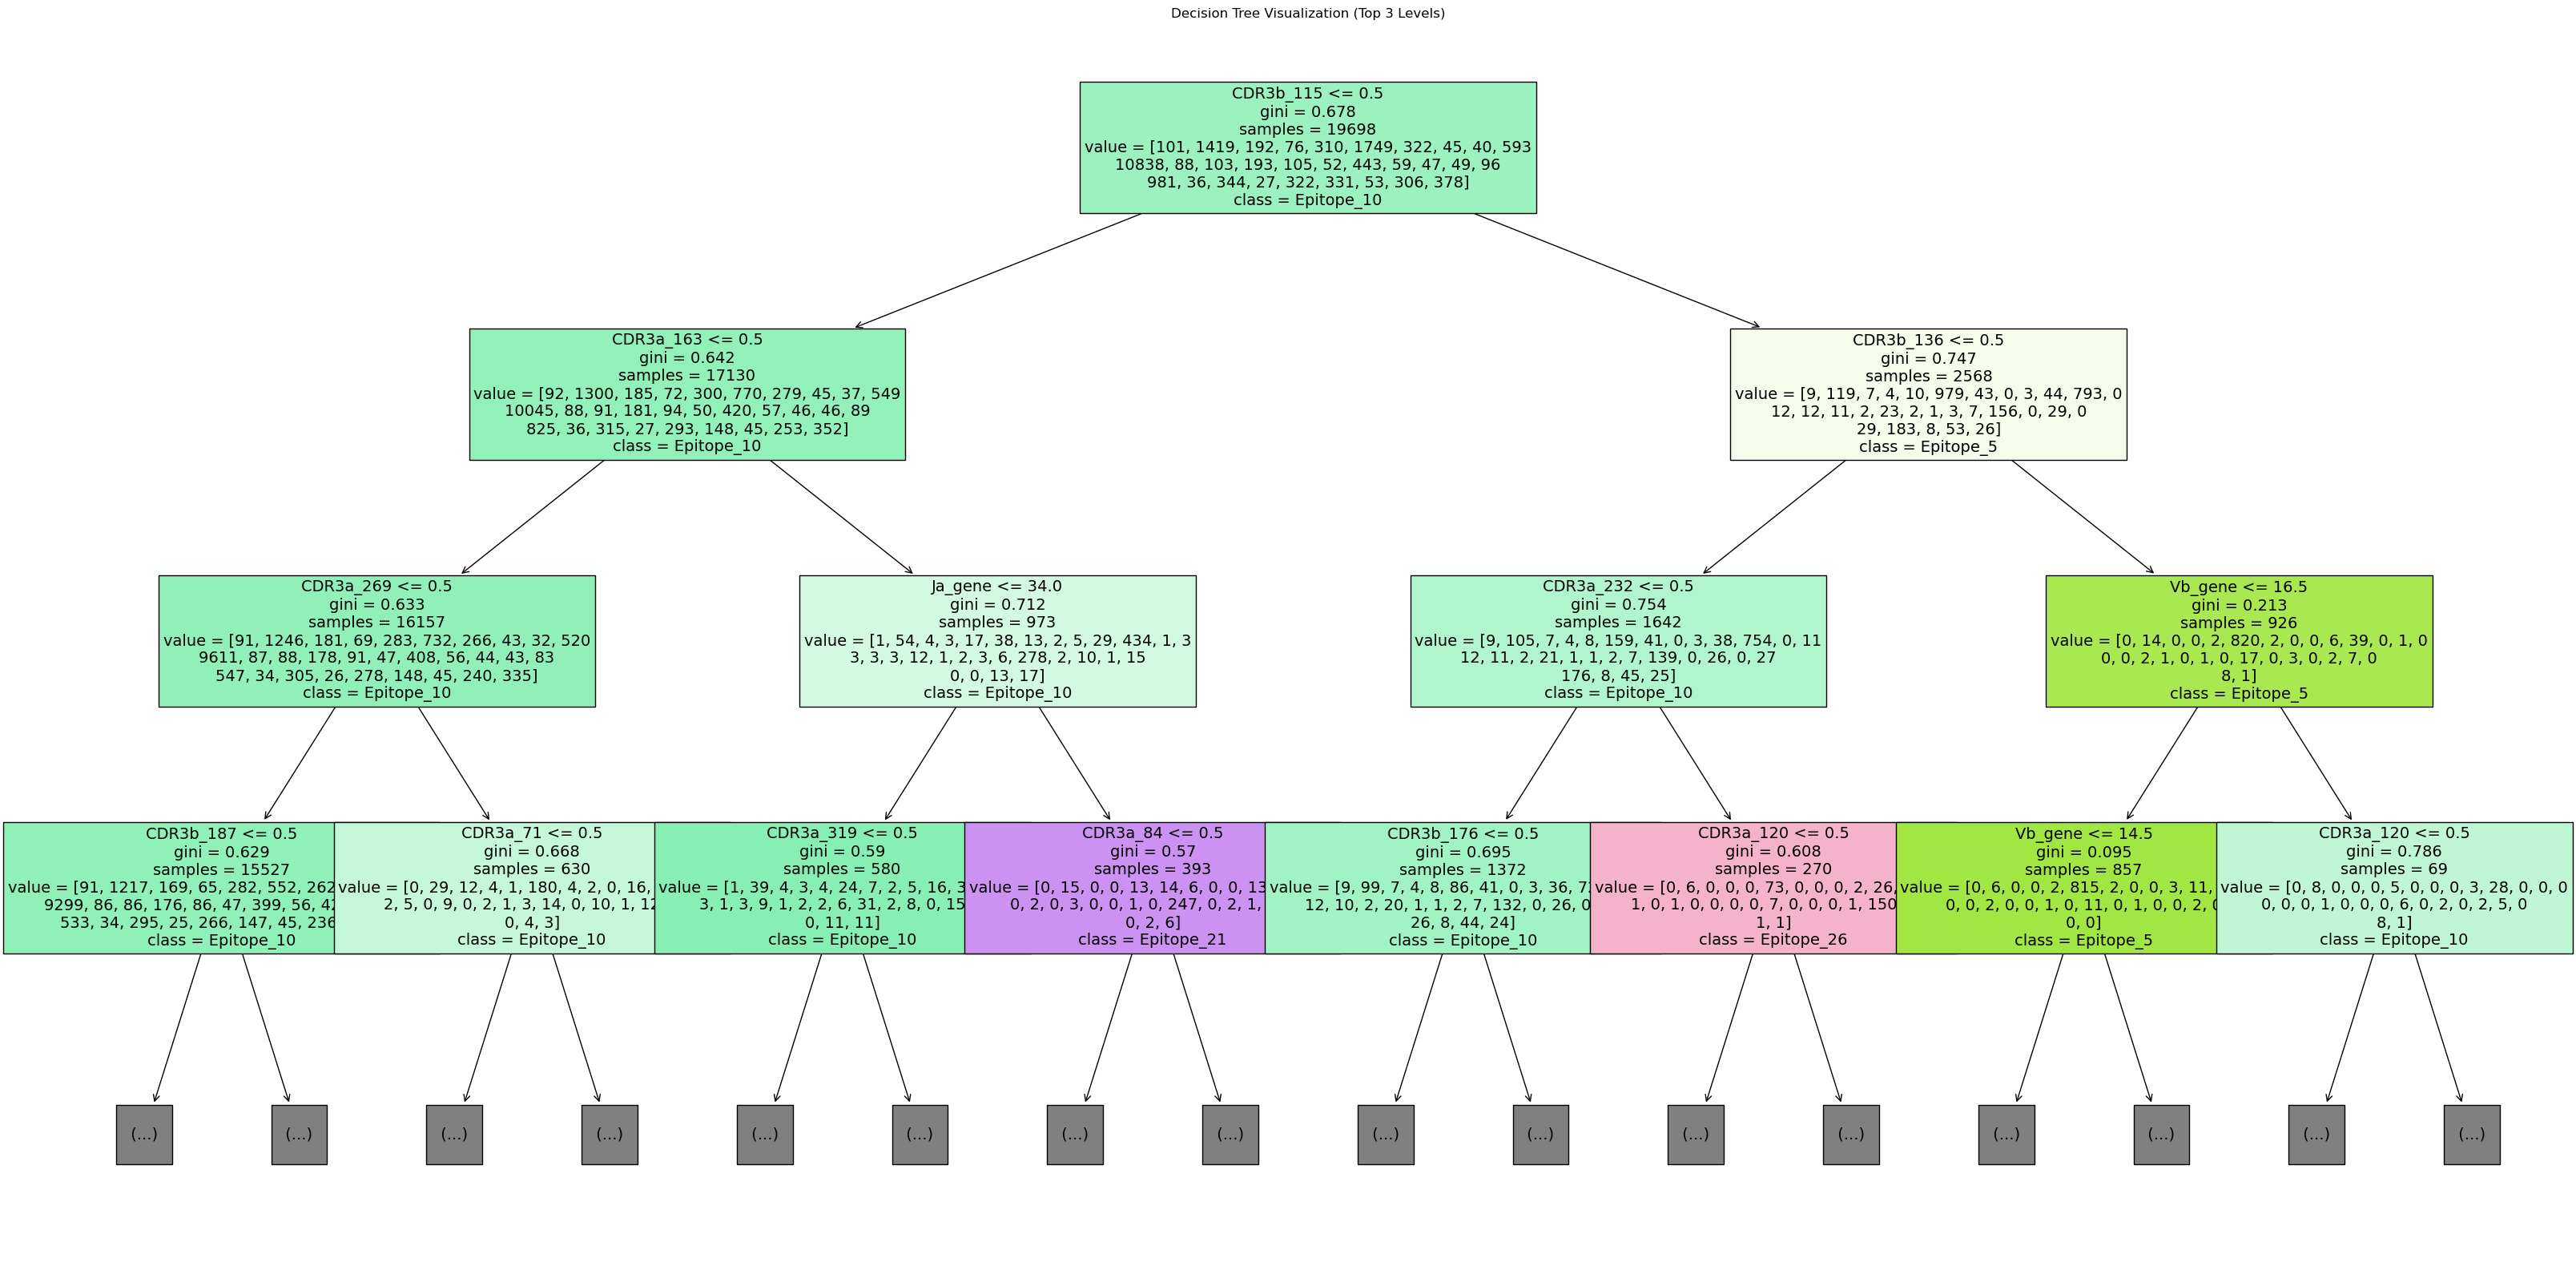

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# 加载重新编码后的数据
encoded_df = pd.read_csv('CDR3_encoded_complete.csv')

# cdr3_a_aa 和 cdr3_b_aa 的 one-hot 编码转换回 numpy 数组
cdr3_a_encoded = np.array([np.fromstring(seq, dtype=int, sep=' ') for seq in encoded_df['cdr3_a_aa_encoded']])
cdr3_b_encoded = np.array([np.fromstring(seq, dtype=int, sep=' ') for seq in encoded_df['cdr3_b_aa_encoded']])

# V 和 J 基因的整数编码可以直接使用
v_b_gene_encoded = encoded_df['v_b_gene_encoded'].values
j_b_gene_encoded = encoded_df['j_b_gene_encoded'].values
v_a_gene_encoded = encoded_df['v_a_gene_encoded'].values
j_a_gene_encoded = encoded_df['j_a_gene_encoded'].values

# epitope 标签已经是整数编码，直接使用
epitope_encoded = encoded_df['antigen.epitope_encoded'].values

# 将所有特征合并为一个特征矩阵
X = np.hstack((cdr3_a_encoded, cdr3_b_encoded, 
               v_b_gene_encoded.reshape(-1, 1), j_b_gene_encoded.reshape(-1, 1),
               v_a_gene_encoded.reshape(-1, 1), j_a_gene_encoded.reshape(-1, 1)))

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, epitope_encoded, test_size=0.2, random_state=42)

# 创建决策树模型
clf = DecisionTreeClassifier(random_state=42)

# 训练模型
clf.fit(X_train, y_train)

# 预测测试集
y_pred = clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 确定特征名
feature_names = [f'CDR3a_{i+1}' for i in range(cdr3_a_encoded.shape[1])] + \
                [f'CDR3b_{i+1}' for i in range(cdr3_b_encoded.shape[1])] + \
                ['Vb_gene', 'Jb_gene', 'Va_gene', 'Ja_gene']

# 确定类名（根据实际的标签数量）
class_names = ['Epitope_' + str(i) for i in np.unique(epitope_encoded)]

# 设置图形大小
plt.figure(figsize=(40, 20))

# 绘制决策树
plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names, fontsize=14,max_depth=3)
plt.title('Decision Tree Visualization (Top 3 Levels)')
plt.show()


Accuracy: 69.18%


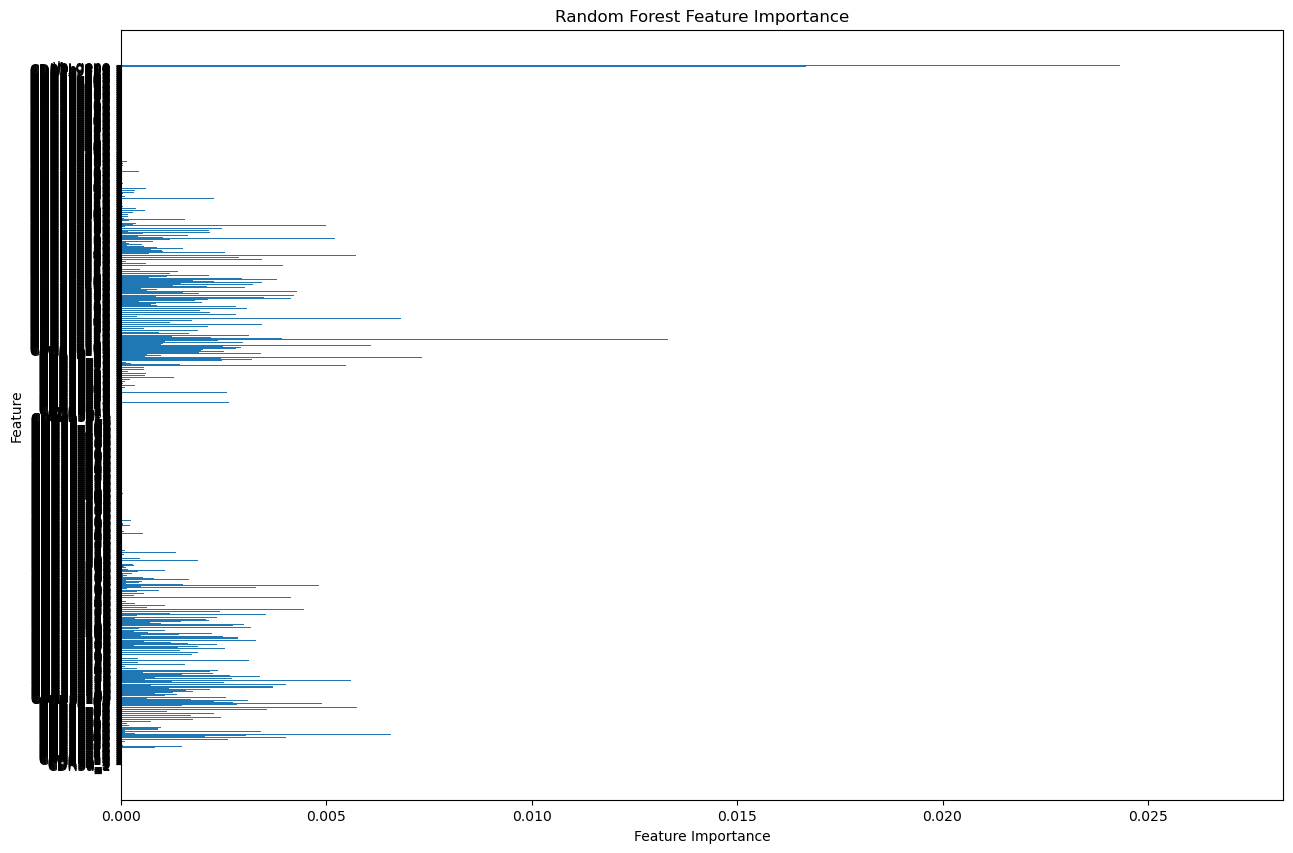

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 加载重新编码后的数据
encoded_df = pd.read_csv('CDR3_encoded_complete.csv')

# cdr3_a_aa 和 cdr3_b_aa 的 one-hot 编码转换回 numpy 数组
cdr3_a_encoded = np.array([np.fromstring(seq, dtype=int, sep=' ') for seq in encoded_df['cdr3_a_aa_encoded']])
cdr3_b_encoded = np.array([np.fromstring(seq, dtype=int, sep=' ') for seq in encoded_df['cdr3_b_aa_encoded']])

# V 和 J 基因的整数编码可以直接使用
v_b_gene_encoded = encoded_df['v_b_gene_encoded'].values
j_b_gene_encoded = encoded_df['j_b_gene_encoded'].values
v_a_gene_encoded = encoded_df['v_a_gene_encoded'].values
j_a_gene_encoded = encoded_df['j_a_gene_encoded'].values

# epitope 标签已经是整数编码，直接使用
epitope_encoded = encoded_df['antigen.epitope_encoded'].values

# 将所有特征合并为一个特征矩阵
X = np.hstack((cdr3_a_encoded, cdr3_b_encoded, 
               v_b_gene_encoded.reshape(-1, 1), j_b_gene_encoded.reshape(-1, 1),
               v_a_gene_encoded.reshape(-1, 1), j_a_gene_encoded.reshape(-1, 1)))

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, epitope_encoded, test_size=0.2, random_state=42)

# 创建随机森林模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
rf.fit(X_train, y_train)

# 预测测试集
y_pred = rf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# 可视化随机森林中的第一棵树（以示例为目的）
# 获取所有决策树的特征重要性
feature_importances = np.mean([tree.feature_importances_ for tree in rf.estimators_], axis=0)

# 可视化特征重要性
plt.figure(figsize=(15, 10))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()



In [9]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# 加载重新编码后的数据
encoded_df = pd.read_csv('CDR3_encoded_complete.csv')

# cdr3_a_aa 和 cdr3_b_aa 的 one-hot 编码转换回 numpy 数组
cdr3_a_encoded = np.array([np.fromstring(seq, dtype=int, sep=' ') for seq in encoded_df['cdr3_a_aa_encoded']])
cdr3_b_encoded = np.array([np.fromstring(seq, dtype=int, sep=' ') for seq in encoded_df['cdr3_b_aa_encoded']])

# V 和 J 基因的整数编码可以直接使用
v_b_gene_encoded = encoded_df['v_b_gene_encoded'].values
j_b_gene_encoded = encoded_df['j_b_gene_encoded'].values
v_a_gene_encoded = encoded_df['v_a_gene_encoded'].values
j_a_gene_encoded = encoded_df['j_a_gene_encoded'].values

# epitope 标签已经是整数编码，直接使用
epitope_encoded = encoded_df['antigen.epitope_encoded'].values

# 将所有特征合并为一个特征矩阵
X = np.hstack((cdr3_a_encoded, cdr3_b_encoded, 
               v_b_gene_encoded.reshape(-1, 1), j_b_gene_encoded.reshape(-1, 1),
               v_a_gene_encoded.reshape(-1, 1), j_a_gene_encoded.reshape(-1, 1)))

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, epitope_encoded, test_size=0.2, random_state=42)

# 创建XGBoost模型
xgb = XGBClassifier(random_state=42)

# 训练模型
xgb.fit(X_train, y_train)

# 预测测试集
y_pred = xgb.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 73.66%


In [11]:
y_prob = xgb.predict_proba(X_test)
auc = roc_auc_score(y_test, y_prob, multi_class='ovo', average='macro')
print(f'ROC AUC Score: {auc:.2f}')


ROC AUC Score: 0.85


In [12]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='macro')
print(f'Recall: {recall * 100:.2f}%')


Recall: 38.43%


In [13]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred,average='macro')
print(f'f1:{f1 * 100:.2f}%')

f1:45.47%


In [15]:
from sklearn.metrics import precision_score
precision = precision_score(y_test,y_pred,average="macro")
print(f'precision:{precision * 100:.2f}%')

precision:76.65%


/Users/lifangyi/anaconda3/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
###错误的
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier

# 加载重新编码后的数据
encoded_df = pd.read_csv('CDR3_encoded_complete.csv')

# cdr3_a_aa 和 cdr3_b_aa 的 one-hot 编码转换回 numpy 数组
cdr3_a_encoded = np.array([np.fromstring(seq, dtype=int, sep=' ') for seq in encoded_df['cdr3_a_aa_encoded']])
cdr3_b_encoded = np.array([np.fromstring(seq, dtype=int, sep=' ') for seq in encoded_df['cdr3_b_aa_encoded']])

# V 和 J 基因的整数编码可以直接使用
v_b_gene_encoded = encoded_df['v_b_gene_encoded'].values
j_b_gene_encoded = encoded_df['j_b_gene_encoded'].values
v_a_gene_encoded = encoded_df['v_a_gene_encoded'].values
j_a_gene_encoded = encoded_df['j_a_gene_encoded'].values

# epitope 标签转换为多标签格式
mlb = MultiLabelBinarizer()
epitope_encoded = mlb.fit_transform(encoded_df['antigen.epitope_encoded'].apply(lambda x: [x]))

# 将所有特征合并为一个特征矩阵
X = np.hstack((cdr3_a_encoded, cdr3_b_encoded,
               v_b_gene_encoded.reshape(-1, 1), j_b_gene_encoded.reshape(-1, 1),
               v_a_gene_encoded.reshape(-1, 1), j_a_gene_encoded.reshape(-1, 1)))

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, epitope_encoded, test_size=0.2, random_state=42)

# 创建一个多标签分类器
xgb = OneVsRestClassifier(XGBClassifier(random_state=42))

# 训练模型
xgb.fit(X_train, y_train)

# 预测测试集
y_pred = xgb.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 64.37%


In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer

# encoded_df = pd.read_csv('CDR3_encoded_complete.csv')

# encoded_df['antigen.epitope_encoded'] = encoded_df['antigen.epitope_encoded'].astype(str).apply(lambda x: x.split(','))

# mlb = MultiLabelBinarizer()
# epitope_encoded = mlb.fit_transform(encoded_df['antigen.epitope_encoded'])

print("Shape of transformed labels:", epitope_encoded.shape)
print("First 5 rows of the transformed labels:\n", epitope_encoded[:5])

print("Classes (epitopes):", mlb.classes_)
# 计算每行中1的出现次数
row_counts = np.sum(epitope_encoded, axis=1)

# 找到出现次数大于1的行
rows_with_more_than_one = np.where(row_counts > 1)[0]

# 打印结果
print("Indices of rows where 1 appears more than once:", rows_with_more_than_one)
print("Number of such rows:", len(rows_with_more_than_one))

Shape of transformed labels: (24623, 30)
First 5 rows of the transformed labels:
 [[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Classes (epitopes): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Indices of rows where 1 appears more than once: []
Number of such rows: 0


Accuracy: 65.60%
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


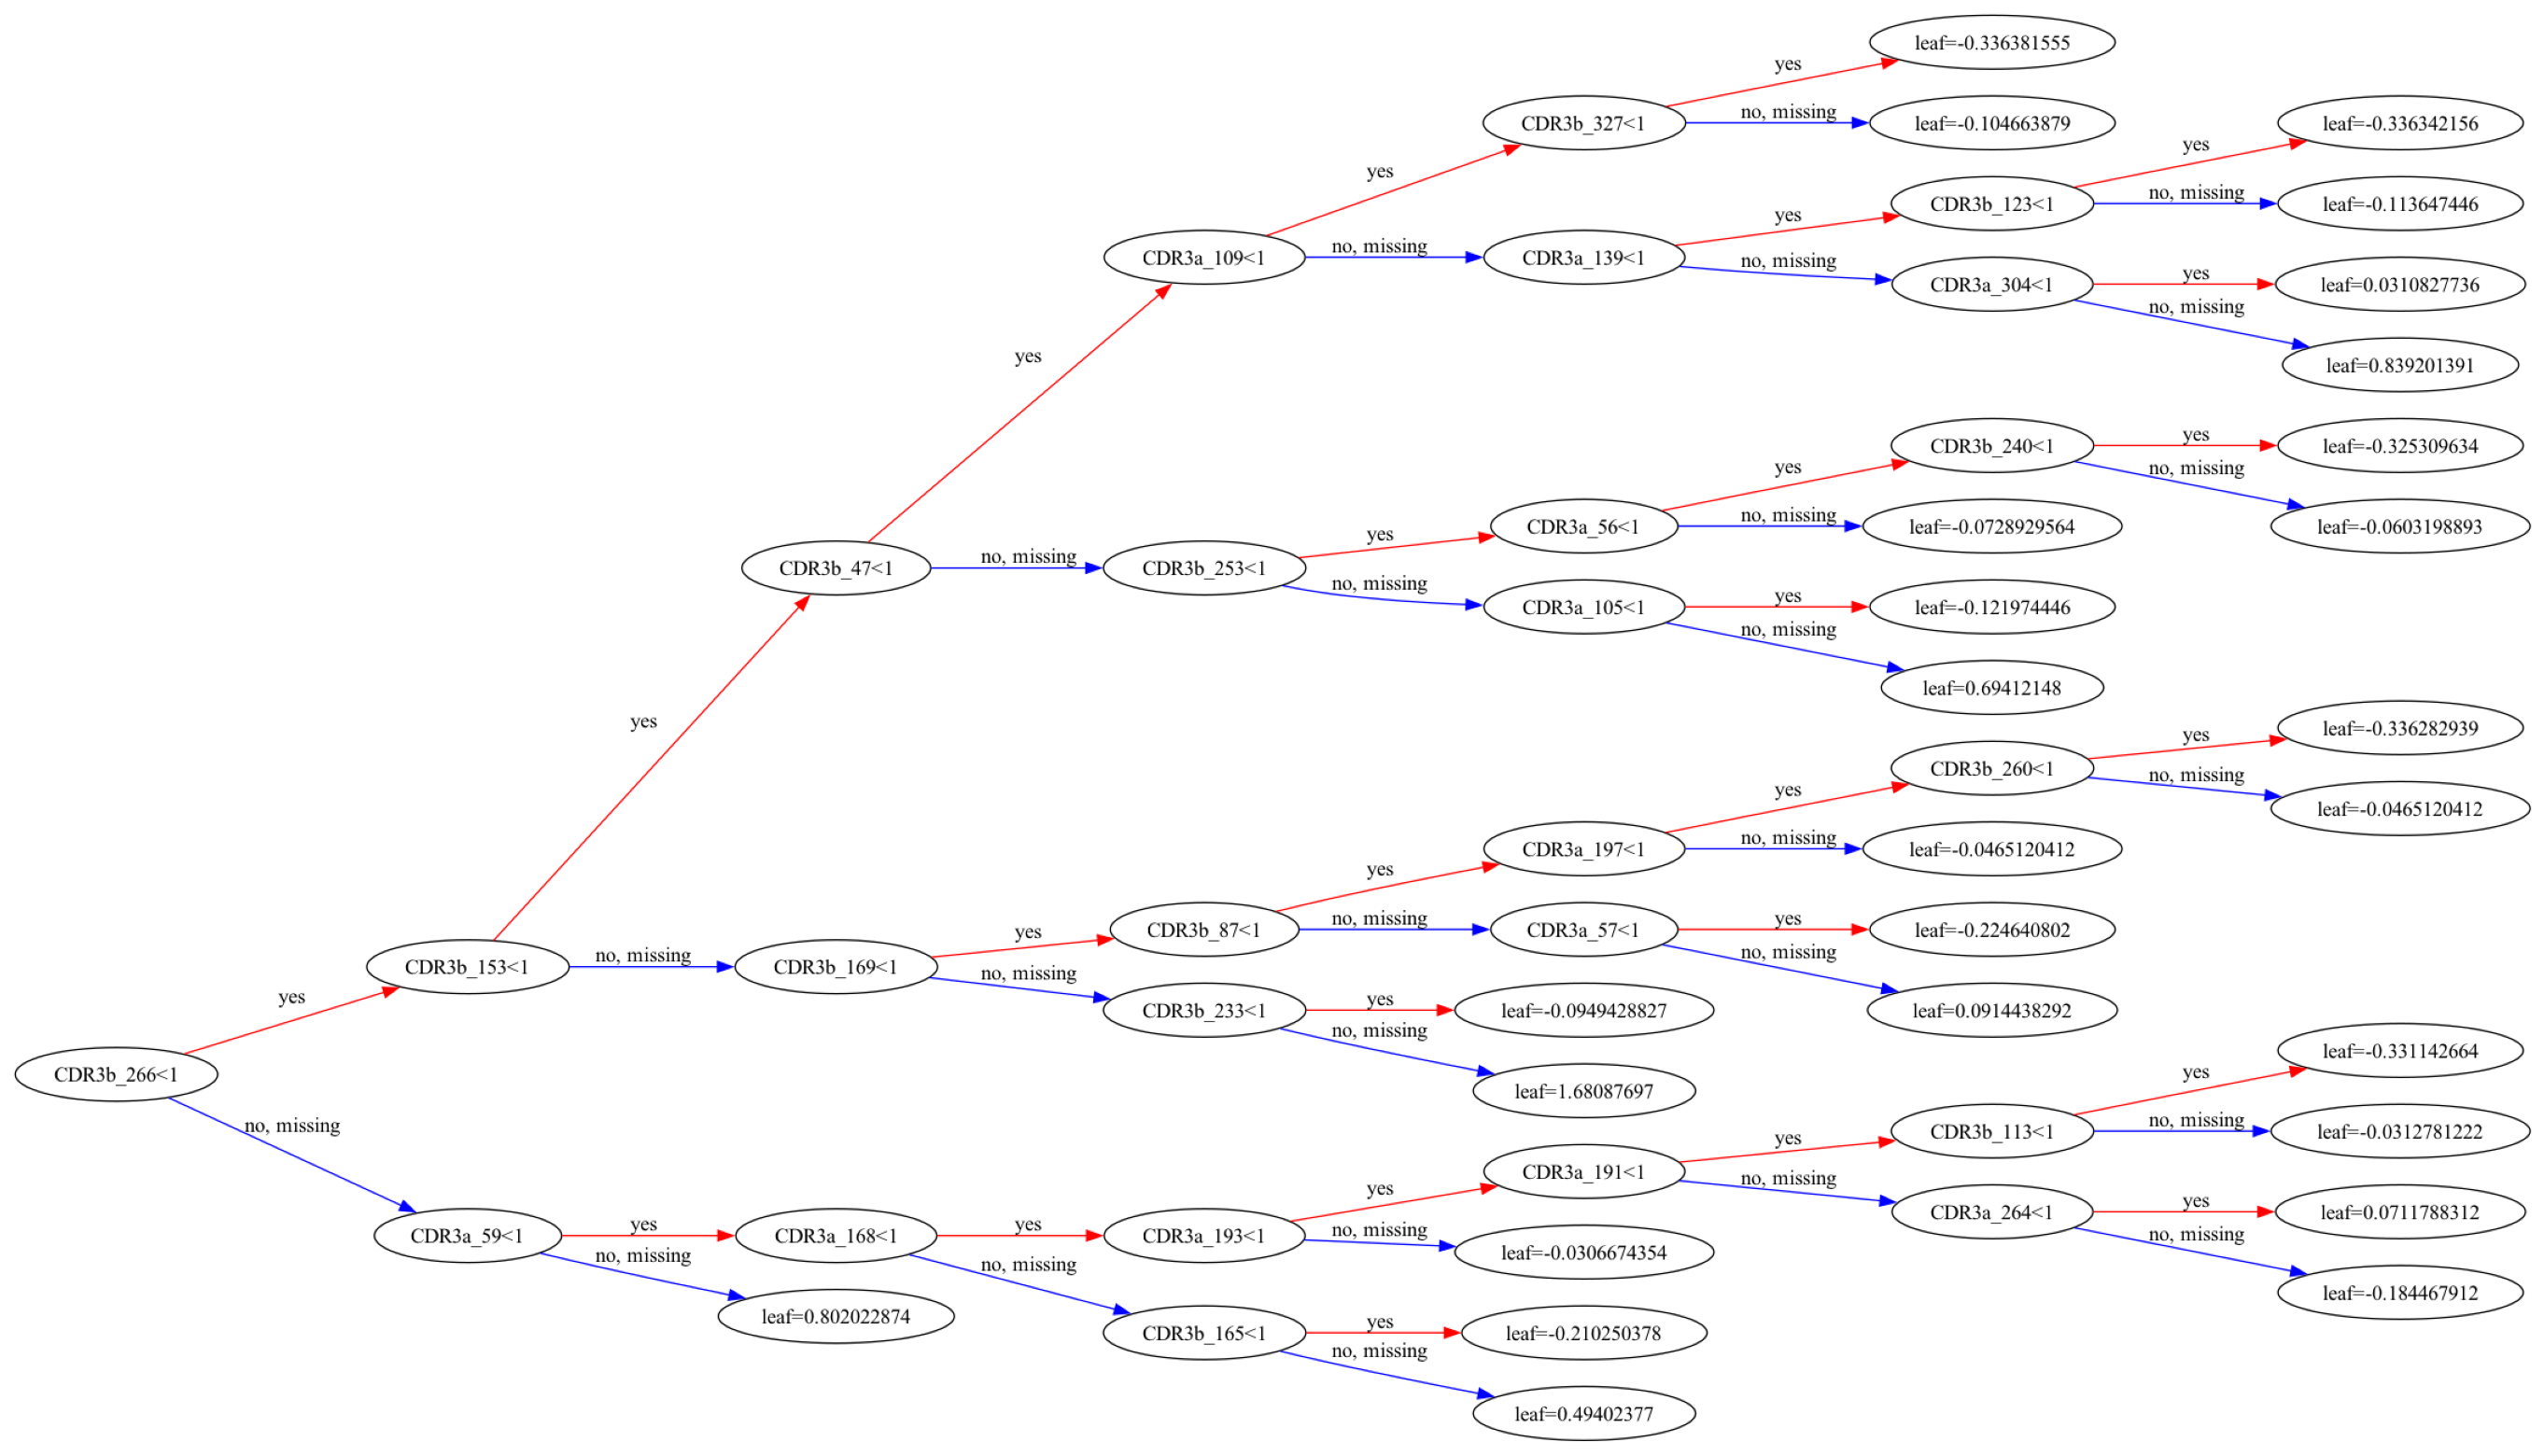

In [4]:
###多标签one-hot，注意，这个才是真正聚合了相同cdr3序列后更改了数据集中的epitope的！！！！！！！！！
###xgboost
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from xgboost import plot_tree

import os
# 将Graphviz的bin目录添加到PATH
import os
# 将Graphviz的bin目录添加到PATH
import os
# 将Graphviz的bin目录添加到PATH
os.environ["PATH"] += os.pathsep + '/opt/homebrew/bin'


# 加载重新编码后的数据
encoded_df = pd.read_csv('CDR3_encoded_complete.csv')

# 确保每个值都是字符串，并尝试分割字符串
encoded_df['epitope_encoded'] = encoded_df['epitope_encoded'].astype(str).apply(lambda x: x.split(','))

# 聚合相同cdr3序列的所有epitope及保持基因编码
aggregated_data = encoded_df.groupby(['CDR3a_encoded', 'CDR3b_encoded']).agg({
    'epitope_encoded': lambda x: list(set([item for sublist in x for item in sublist]))
    # 'v_b_gene_encoded': 'first',
    # 'j_b_gene_encoded': 'first',
    # 'v_a_gene_encoded': 'first',
    # 'j_a_gene_encoded': 'first'
}).reset_index()
# cdr3_a_aa 和 cdr3_b_aa 的 one-hot 编码转换回 numpy 数组
cdr3_a_encoded = np.array([np.fromstring(seq, dtype=int, sep=' ') for seq in aggregated_data['CDR3a_encoded']])
cdr3_b_encoded = np.array([np.fromstring(seq, dtype=int, sep=' ') for seq in aggregated_data['CDR3b_encoded']])

# # V 和 J 基因的整数编码可以直接使用
# v_b_gene_encoded = aggregated_data['v_b_gene_encoded'].values
# j_b_gene_encoded = aggregated_data['j_b_gene_encoded'].values
# v_a_gene_encoded = aggregated_data['v_a_gene_encoded'].values
# j_a_gene_encoded = aggregated_data['j_a_gene_encoded'].values

# 多标签格式转换
mlb = MultiLabelBinarizer()
epitope_encoded = mlb.fit_transform(aggregated_data['epitope_encoded'])

# 将所有特征合并为一个特征矩阵
X = np.hstack((cdr3_a_encoded, cdr3_b_encoded,
               #v_b_gene_encoded.reshape(-1, 1), j_b_gene_encoded.reshape(-1, 1),
               #v_a_gene_encoded.reshape(-1, 1), j_a_gene_encoded.reshape(-1, 1))
              ))

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, epitope_encoded, test_size=0.2, random_state=42)

# 创建一个多标签分类器
xgb = OneVsRestClassifier(XGBClassifier(random_state=42))

# 训练模型
xgb.fit(X_train, y_train)

# 预测测试集
y_pred = xgb.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(y_pred[0])
print(y_test[0])


# xgb_classifier = xgb.estimators_[0]

# # 获取XGBoost模型的 Booster 对象
# booster = xgb_classifier.get_booster()
# 从OneVsRestClassifier中取出第一个分类器的训练好的Booster对象
booster = xgb.estimators_[0].get_booster()

# 特征名称
feature_names = ['CDR3a_' + str(i) for i in range(cdr3_a_encoded.shape[1])] + \
                ['CDR3b_' + str(i) for i in range(cdr3_b_encoded.shape[1])]

# 设置特征名称到Booster对象
booster.feature_names = feature_names
# 可视化第一棵树（使用 num_trees=0 指定第一棵树）
plt.figure(figsize=(40, 20))  # 设置图形的尺寸
plot_tree(booster, num_trees=0,rankdir = 'LR',ax=plt.gca())  # 'LR' 使树从左到右显示rankdir='LR'
plt.savefig('xgboost.jpeg',dpi = 300)
plt.show()


In [2]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred,average='macro')
print(f'f1:{f1 * 100:.2f}%')

f1:35.57%


In [3]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, average_precision_score
y_prob = xgb.predict_proba(X_test)
auc = roc_auc_score(y_test, y_prob, multi_class='ovo', average='macro')
print(f'ROC AUC Score: {auc:.2f}')


ROC AUC Score: 0.79


In [4]:
from sklearn.metrics import average_precision_score

# 预测概率
y_prob = xgb.predict_proba(X_test)

# 计算每个类别的平均精度分数
average_precision = np.mean([average_precision_score(y_test[:, i], y_prob[:, i]) for i in range(y_test.shape[1])])

print(f'Average Precision Score: {average_precision:.2f}')


Average Precision Score: 0.38


In [ ]:
####接上一个代码块，这个代码块是相同的多标签预测，但是使用的是rf random forrest
###多标签one-hot，注意，这个才是真正聚合了相同cdr3序列后更改了数据集中的epitope的！！！！！！！！！
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# 加载重新编码后的数据
encoded_df = pd.read_csv('CDR3_encoded_complete.csv')

# 确保每个值都是字符串，并尝试分割字符串
encoded_df['epitope_encoded'] = encoded_df['epitope_encoded'].astype(str).apply(lambda x: x.split(','))

# 聚合相同cdr3序列的所有epitope及保持基因编码
aggregated_data = encoded_df.groupby(['CDR3a_encoded', 'CDR3b_encoded']).agg({
    'epitope_encoded': lambda x: list(set([item for sublist in x for item in sublist]))
    # 'v_b_gene_encoded': 'first',
    # 'j_b_gene_encoded': 'first',
    # 'v_a_gene_encoded': 'first',
    # 'j_a_gene_encoded': 'first'
}).reset_index()

# cdr3_a_aa 和 cdr3_b_aa 的 one-hot 编码转换回 numpy 数组
cdr3_a_encoded = np.array([np.fromstring(seq, dtype=int, sep=' ') for seq in aggregated_data['CDR3a_encoded']])
cdr3_b_encoded = np.array([np.fromstring(seq, dtype=int, sep=' ') for seq in aggregated_data['CDR3b_encoded']])

# # V 和 J 基因的整数编码可以直接使用
# v_b_gene_encoded = aggregated_data['v_b_gene_encoded'].values
# j_b_gene_encoded = aggregated_data['j_b_gene_encoded'].values
# v_a_gene_encoded = aggregated_data['v_a_gene_encoded'].values
# j_a_gene_encoded = aggregated_data['j_a_gene_encoded'].values

# 多标签格式转换
mlb = MultiLabelBinarizer()
epitope_encoded = mlb.fit_transform(aggregated_data['epitope_encoded'])

# 将所有特征合并为一个特征矩阵
X = np.hstack((cdr3_a_encoded, cdr3_b_encoded,
               #v_b_gene_encoded.reshape(-1, 1), j_b_gene_encoded.reshape(-1, 1),
               #v_a_gene_encoded.reshape(-1, 1), j_a_gene_encoded.reshape(-1, 1))
              ))

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, epitope_encoded, test_size=0.2, random_state=42)

# 创建一个多标签分类器
xgb = RandomForestClassifier(n_estimators=120, random_state=42)

# 训练模型
xgb.fit(X_train, y_train)

# 预测测试集
y_pred = xgb.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(y_pred[0])
print(y_test[0])

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

###可视化决策
# 确定特征名
feature_names = [f'CDR3a_{i+1}' for i in range(cdr3_a_encoded.shape[1])] + \
                [f'CDR3b_{i+1}' for i in range(cdr3_b_encoded.shape[1])]

# 确定类名（根据实际的标签数量）
class_names = ['Epitope_' + str(i) for i in np.unique(epitope_encoded)]
tree_in_forest = xgb.estimators_[0]
# 设置图形大小
plt.figure(figsize=(40, 20))

# 绘制决策树
plot_tree(tree_in_forest, filled=True, feature_names=feature_names, class_names=class_names,max_depth = 3)
plt.title("Visualizing a tree from a RandomForest")
plt.show()

In [336]:
####接上一个代码块，这个代码块是相同的多标签预测，但是使用的是knn
###多标签one-hot，注意，这个才是真正聚合了相同cdr3序列后更改了数据集中的epitope的！！！！！！！！！
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier

# 加载重新编码后的数据
encoded_df = pd.read_csv('CDR3_encoded_complete.csv')

# 确保每个值都是字符串，并尝试分割字符串
encoded_df['epitope_encoded'] = encoded_df['epitope_encoded'].astype(str).apply(lambda x: x.split(','))

# 聚合相同cdr3序列的所有epitope及保持基因编码
aggregated_data = encoded_df.groupby(['CDR3a_encoded', 'CDR3b_encoded']).agg({
    'epitope_encoded': lambda x: list(set([item for sublist in x for item in sublist]))
    # 'v_b_gene_encoded': 'first',
    # 'j_b_gene_encoded': 'first',
    # 'v_a_gene_encoded': 'first',
    # 'j_a_gene_encoded': 'first'
}).reset_index()

# cdr3_a_aa 和 cdr3_b_aa 的 one-hot 编码转换回 numpy 数组
cdr3_a_encoded = np.array([np.fromstring(seq, dtype=int, sep=' ') for seq in aggregated_data['CDR3a_encoded']])
cdr3_b_encoded = np.array([np.fromstring(seq, dtype=int, sep=' ') for seq in aggregated_data['CDR3b_encoded']])

# # V 和 J 基因的整数编码可以直接使用
# v_b_gene_encoded = aggregated_data['v_b_gene_encoded'].values
# j_b_gene_encoded = aggregated_data['j_b_gene_encoded'].values
# v_a_gene_encoded = aggregated_data['v_a_gene_encoded'].values
# j_a_gene_encoded = aggregated_data['j_a_gene_encoded'].values

# 多标签格式转换
mlb = MultiLabelBinarizer()
epitope_encoded = mlb.fit_transform(aggregated_data['epitope_encoded'])

# 将所有特征合并为一个特征矩阵
X = np.hstack((cdr3_a_encoded, cdr3_b_encoded,
               #v_b_gene_encoded.reshape(-1, 1), j_b_gene_encoded.reshape(-1, 1),
               #v_a_gene_encoded.reshape(-1, 1), j_a_gene_encoded.reshape(-1, 1))
              ))

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, epitope_encoded, test_size=0.2, random_state=42)

# 创建一个多标签分类器
xgb = OneVsRestClassifier(KNeighborsClassifier(n_neighbors = 10))

# 训练模型
xgb.fit(X_train, y_train)

# 预测测试集
y_pred = xgb.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(y_pred[0])
print(y_test[0])


Accuracy: 56.61%
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
####接上一个代码块，这个代码块是相同的多标签预测，但是使用的是svm
###多标签one-hot，注意，这个才是真正聚合了相同cdr3序列后更改了数据集中的epitope的！！！！！！！！！
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

# 加载重新编码后的数据
encoded_df = pd.read_csv('CDR3_encoded_complete.csv')

# 确保每个值都是字符串，并尝试分割字符串
encoded_df['epitope_encoded'] = encoded_df['epitope_encoded'].astype(str).apply(lambda x: x.split(','))

# 聚合相同cdr3序列的所有epitope及保持基因编码
aggregated_data = encoded_df.groupby(['CDR3a_encoded', 'CDR3b_encoded']).agg({
    'epitope_encoded': lambda x: list(set([item for sublist in x for item in sublist]))
    # 'v_b_gene_encoded': 'first',
    # 'j_b_gene_encoded': 'first',
    # 'v_a_gene_encoded': 'first',
    # 'j_a_gene_encoded': 'first'
}).reset_index()

# cdr3_a_aa 和 cdr3_b_aa 的 one-hot 编码转换回 numpy 数组
cdr3_a_encoded = np.array([np.fromstring(seq, dtype=int, sep=' ') for seq in aggregated_data['CDR3a_encoded']])
cdr3_b_encoded = np.array([np.fromstring(seq, dtype=int, sep=' ') for seq in aggregated_data['CDR3b_encoded']])

# # V 和 J 基因的整数编码可以直接使用
# v_b_gene_encoded = aggregated_data['v_b_gene_encoded'].values
# j_b_gene_encoded = aggregated_data['j_b_gene_encoded'].values
# v_a_gene_encoded = aggregated_data['v_a_gene_encoded'].values
# j_a_gene_encoded = aggregated_data['j_a_gene_encoded'].values

# 多标签格式转换
mlb = MultiLabelBinarizer()
epitope_encoded = mlb.fit_transform(aggregated_data['epitope_encoded'])

# 将所有特征合并为一个特征矩阵
X = np.hstack((cdr3_a_encoded, cdr3_b_encoded,
               #v_b_gene_encoded.reshape(-1, 1), j_b_gene_encoded.reshape(-1, 1),
               #v_a_gene_encoded.reshape(-1, 1), j_a_gene_encoded.reshape(-1, 1))
              ))

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, epitope_encoded, test_size=0.2, random_state=42)

# 创建一个多标签分类器
xgb = OneVsRestClassifier(SVC(kernel='linear', probability=True))

# 训练模型
xgb.fit(X_train, y_train)

# 预测测试集
y_pred = xgb.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(y_pred[0])
print(y_test[0])


In [331]:
from sklearn.metrics import precision_score
precision = precision_score(y_test,y_pred,average="macro")
print(f'precision:{precision * 100:.2f}%')


precision:47.44%


/Users/lifangyi/anaconda3/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [332]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred,average='macro')
print(f'f1:{f1 * 100:.2f}%')

f1:27.78%


In [333]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='macro')
print(f'Recall: {recall * 100:.2f}%')


Recall: 23.03%


In [334]:
from sklearn.metrics import average_precision_score

# 预测概率
y_prob = xgb.predict_proba(X_test)

# 计算每个类别的平均精度分数
average_precision = np.mean([average_precision_score(y_test[:, i], y_prob[:, i]) for i in range(y_test.shape[1])])

print(f'Average Precision Score: {average_precision:.2f}')


TypeError: list indices must be integers or slices, not tuple

In [335]:
from sklearn.metrics import roc_auc_score
y_prob = xgb.predict_proba(X_test)
auc = roc_auc_score(y_test, y_prob, multi_class='ovo', average='macro')
print(f'ROC AUC Score: {auc:.2f}')


ValueError: Found array with dim 3. None expected <= 2.

In [32]:
print("Shape of transformed labels:", epitope_encoded.shape)
print("First 5 rows of the transformed labels:\n", epitope_encoded[:5])

print("Classes (epitopes):", mlb.classes_)
# 计算每行中1的出现次数
row_counts = np.sum(epitope_encoded, axis=1)

# 找到出现次数大于1的行
rows_with_more_than_one = np.where(row_counts > 1)[0]

# 打印结果
print("Indices of rows where 1 appears more than once:", rows_with_more_than_one)
print("Number of such rows:", len(rows_with_more_than_one))

Shape of transformed labels: (22469, 30)
First 5 rows of the transformed labels:
 [[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Classes (epitopes): ['0' '1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21'
 '22' '23' '24' '25' '26' '27' '28' '29' '3' '4' '5' '6' '7' '8' '9']
Indices of rows where 1 appears more than once: [   26    27    36 ... 22461 22463 22466]
Number of such rows: 1071


In [9]:
###多标签kmer
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# 加载重新编码后的k-mer数据
encoded_df = pd.read_csv('CDR3_kmer_encoded_complete.csv')

# 确保每个值都是字符串，并尝试分割字符串
encoded_df['antigen.epitope_encoded'] = encoded_df['antigen.epitope_encoded'].astype(str).apply(lambda x: x.split(','))

# 确定所有的k-mer列
kmer_columns_a = [col for col in encoded_df.columns if col.startswith('kmer_a_')]
kmer_columns_b = [col for col in encoded_df.columns if col.startswith('kmer_b_')]

# 聚合相同cdr3序列的所有epitope及保持基因编码和k-mer数据
aggregated_data = encoded_df.groupby(['cdr3_a_aa', 'cdr3_b_aa']).agg({
    'antigen.epitope_encoded': lambda x: list(set([item for sublist in x for item in sublist])),
    **{col: 'sum' for col in kmer_columns_a},  # 使用sum来聚合k-mer频率
    **{col: 'sum' for col in kmer_columns_b},
    # 'v_b_gene_encoded': 'first',
    # 'j_b_gene_encoded': 'first',
    # 'v_a_gene_encoded': 'first',
    # 'j_a_gene_encoded': 'first'
}).reset_index()

# 从聚合后的数据框中提取k-mer特征和基因编码
cdr3_a_encoded = aggregated_data[kmer_columns_a].values
cdr3_b_encoded = aggregated_data[kmer_columns_b].values

# # V 和 J 基因的整数编码可以直接使用
# v_b_gene_encoded = aggregated_data['v_b_gene_encoded'].values
# j_b_gene_encoded = aggregated_data['j_b_gene_encoded'].values
# v_a_gene_encoded = aggregated_data['v_a_gene_encoded'].values
# j_a_gene_encoded = aggregated_data['j_a_gene_encoded'].values

# 多标签格式转换
mlb = MultiLabelBinarizer()
epitope_encoded = mlb.fit_transform(aggregated_data['antigen.epitope_encoded'])

# 将所有特征合并为一个特征矩阵
X = np.hstack((cdr3_a_encoded, cdr3_b_encoded,
               # v_b_gene_encoded.reshape(-1, 1), j_b_gene_encoded.reshape(-1, 1),
               # v_a_gene_encoded.reshape(-1, 1), j_a_gene_encoded.reshape(-1, 1)
              ))

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, epitope_encoded, test_size=0.2, random_state=42)

# 创建一个多标签分类器
xgb = OneVsRestClassifier(XGBClassifier(random_state=42))

# 训练模型
xgb.fit(X_train, y_train)

# 预测测试集
y_pred = xgb.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(y_pred)

Accuracy: 67.51%
[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [251]:
###多标签分类问题kmer
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# 加载重新编码后的 k-mer 数据
encoded_df = pd.read_csv('CDR3_kmer_encoded_complete.csv')

# 确保每个值都是字符串，并尝试分割字符串
encoded_df['antigen.epitope_encoded'] = encoded_df['antigen.epitope_encoded'].astype(str).apply(lambda x: x.split(','))

# 确定所有的 k-mer 列
kmer_columns_a = [col for col in encoded_df.columns if col.startswith('kmer_a_')]
kmer_columns_b = [col for col in encoded_df.columns if col.startswith('kmer_b_')]

# 聚合相同 cdr3 序列的所有 epitope 及保持基因编码和 k-mer 数据，不进行相加
aggregated_data = encoded_df.groupby(['cdr3_a_aa', 'cdr3_b_aa']).agg({
    'antigen.epitope_encoded': lambda x: list(set([item for sublist in x for item in sublist])),
    **{col: 'first' for col in kmer_columns_a},  # 使用 'first' 保留每个 k-mer 的具体计数值
    **{col: 'first' for col in kmer_columns_b},
    'v_b_gene_encoded': 'first',
    'j_b_gene_encoded': 'first',
    'v_a_gene_encoded': 'first',
    'j_a_gene_encoded': 'first'
}).reset_index()

# 从聚合后的数据框中提取 k-mer 特征和基因编码
cdr3_a_encoded = aggregated_data[kmer_columns_a].values
cdr3_b_encoded = aggregated_data[kmer_columns_b].values

# V 和 J 基因的整数编码可以直接使用
v_b_gene_encoded = aggregated_data['v_b_gene_encoded'].values
j_b_gene_encoded = aggregated_data['j_b_gene_encoded'].values
v_a_gene_encoded = aggregated_data['v_a_gene_encoded'].values
j_a_gene_encoded = aggregated_data['j_a_gene_encoded'].values

# 多标签格式转换
mlb = MultiLabelBinarizer()
epitope_encoded = mlb.fit_transform(aggregated_data['antigen.epitope_encoded'])

# 将所有特征合并为一个特征矩阵
X = np.hstack((cdr3_a_encoded, cdr3_b_encoded,
               v_b_gene_encoded.reshape(-1, 1), j_b_gene_encoded.reshape(-1, 1),
               v_a_gene_encoded.reshape(-1, 1), j_a_gene_encoded.reshape(-1, 1)))

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, epitope_encoded, test_size=0.2, random_state=42)

# 创建一个多标签分类器
xgb = OneVsRestClassifier(XGBClassifier(random_state=42))

# 训练模型
xgb.fit(X_train, y_train)

# 预测测试集
y_pred = xgb.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
#print(y_pred)

KeyboardInterrupt: 

In [26]:
from sklearn.metrics import roc_auc_score
y_prob = xgb.predict_proba(X_test)
auc = roc_auc_score(y_test, y_prob, multi_class='ovo', average='macro')
print(f'ROC AUC Score: {auc:.2f}')

ROC AUC Score: 0.78


In [27]:
from sklearn.metrics import precision_score
precision = precision_score(y_test,y_pred,average="macro")
print(f'precision:{precision * 100:.2f}%')

precision:67.11%


/Users/lifangyi/anaconda3/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred,average='macro')
print(f'f1:{f1 * 100:.2f}%')

f1:35.09%


In [29]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='macro')
print(f'Recall: {recall * 100:.2f}%')


Recall: 28.22%


In [30]:
from sklearn.metrics import average_precision_score

# 预测概率
y_prob = xgb.predict_proba(X_test)

# 计算每个类别的平均精度分数
average_precision = np.mean([average_precision_score(y_test[:, i], y_prob[:, i]) for i in range(y_test.shape[1])])

print(f'Average Precision Score: {average_precision:.2f}')


Average Precision Score: 0.36


In [8]:
###二分类 one-hot
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# 加载数据
df = pd.read_csv('CDR3_encoded_complete_fake5.csv')

# 处理数据：将编码序列从字符串转换为数值数组
df['CDR3a_encoded'] = df['CDR3a_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
df['CDR3b_encoded'] = df['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
# 合并CDR3a和CDR3b编码
X = np.hstack((np.vstack(df['CDR3a_encoded'].values), np.vstack(df['CDR3b_encoded'].values)))
# 添加peptide_encoded作为特征
X = np.hstack((X, df['epitope_encoded'].values.reshape(-1,1)))

# 定义目标变量
y = df['binder'].values

# 划分训练和测试数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化XGBoost模型
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# 训练模型
model.fit(X_train, y_train)

# 预测测试集
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 86.44%


In [214]:
from sklearn.metrics import roc_auc_score

# 使用predict_proba获取预测结果的概率值
y_probs = model.predict_proba(X_test)[:, 1]  # 获取属于类别1（正类）的概率

# 计算ROC AUC Score
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC Score: {:.2f}".format(roc_auc))


ROC AUC Score: 0.80


In [215]:
from sklearn.metrics import precision_score

# 使用predict方法获取测试集的预测类标签
y_pred = model.predict(X_test)

# 计算Precision
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))


Precision: 0.95


In [216]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred,average='macro')
print(f'f1:{f1 * 100:.2f}%')

f1:62.95%


In [217]:
from sklearn.metrics import average_precision_score

# 使用predict_proba获取预测结果的概率值
y_probs = model.predict_proba(X_test)[:, 1]  # 获取属于类别1的概率

# 计算Average Precision Score
average_precision = average_precision_score(y_test, y_probs)
print("Average Precision Score: {:.2f}".format(average_precision))


Average Precision Score: 0.58


In [200]:
from sklearn.metrics import recall_score

# 使用predict方法获取测试集的预测类标签
y_pred = model.predict(X_test)

# 计算Recall
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))


Recall: 0.20


In [195]:
###二分类某个epitope one-hot

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# 加载处理后的数据集和原始数据集
df = pd.read_csv('CDR3_encoded_complete_fake5.csv')
df1 = pd.read_csv('/Users/lifangyi/Desktop/UOB/mini/data_clean_large_neg.csv',sep='\t')

# 在原始数据集df1中找到特定peptide的编码值
label_encoder = LabelEncoder()
df1['epitope_encoded'] = label_encoder.fit_transform(df1['antigen.epitope'])
peptide_target = "KLGGALQAK"
peptide_encoded_target = df1[df1['antigen.epitope'] == peptide_target]['epitope_encoded'].iloc[0]

# 在处理过的数据集df中过滤出对应peptide_encoded的行
df_filtered = df[df['epitope_encoded'] == peptide_encoded_target]

# 处理数据：将编码序列从字符串转换为数值数组
df_filtered['CDR3a_encoded'] = df_filtered['CDR3a_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))

# 合并CDR3a和CDR3b编码
X = np.hstack((np.vstack(df_filtered['CDR3a_encoded'].values), np.vstack(df_filtered['CDR3b_encoded'].values)))

# 定义目标变量
y = df_filtered['binder'].values

# 划分训练和测试数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化XGBoost模型
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# 训练模型
model.fit(X_train, y_train)

# 预测测试集
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_60261/2304089791.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3a_encoded'] = df_filtered['CDR3a_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_60261/2304089791.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


Accuracy: 87.85%


In [196]:
from sklearn.metrics import roc_auc_score
# 使用predict_proba获取预测结果的概率值
y_probs = model.predict_proba(X_test)[:, 1]  # 获取属于类别1的概率

# 计算ROC AUC Score
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC Score: {:.2f}".format(roc_auc))


ROC AUC Score: 0.90


In [197]:
from sklearn.metrics import precision_score

# 使用predict方法获取测试集的预测类标签
y_pred = model.predict(X_test)

# 计算Precision
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))


Precision: 0.99


In [181]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred,average='macro')
print(f'f1:{f1 * 100:.2f}%')

f1:68.12%


In [182]:
from sklearn.metrics import average_precision_score

# 使用predict_proba获取预测结果的概率值
y_probs = model.predict_proba(X_test)[:, 1]  # 获取属于类别1的概率

# 计算Average Precision Score
average_precision = average_precision_score(y_test, y_probs)
print("Average Precision Score: {:.2f}".format(average_precision))


Average Precision Score: 0.76


In [183]:
from sklearn.metrics import recall_score

# 使用predict方法获取测试集的预测类标签
y_pred = model.predict(X_test)

# 计算Recall
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))


Recall: 0.27


In [139]:
###kmer二分类
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# 加载处理后的数据集和原始数据集
df = pd.read_csv('CDR3_encoded_complete_fake_kmer2.csv')
df1 = pd.read_csv('/Users/lifangyi/Desktop/VDJ_test_2.csv')

# 在原始数据集df1中找到特定peptide的编码值
label_encoder = LabelEncoder()
df1['peptide_encoded'] = label_encoder.fit_transform(df1['peptide'])
peptide_target = "GILGFVFTL"
peptide_encoded_target = df1[df1['peptide'] == peptide_target]['peptide_encoded'].iloc[0]

# 在处理过的数据集df中过滤出对应peptide_encoded的行
df_filtered = df[df['peptide_encoded'] == peptide_encoded_target]

# 使用CountVectorizer将k-mer转换为特征矩阵
vectorizer = CountVectorizer()
CDR3a_features = vectorizer.fit_transform(df_filtered['CDR3a_kmers'])
CDR3b_features = vectorizer.fit_transform(df_filtered['CDR3b_kmers'])

# 合并CDR3a和CDR3b的特征
from scipy.sparse import hstack
X = hstack([CDR3a_features, CDR3b_features])

# 定义目标变量
y = df_filtered['binder'].values

# 划分训练和测试数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化XGBoost模型
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# 训练模型
model.fit(X_train, y_train)

# 预测测试集
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 95.82%


In [140]:
from sklearn.metrics import roc_auc_score
# 使用predict_proba获取预测结果的概率值
y_probs = model.predict_proba(X_test)[:, 1]  # 获取属于类别1的概率

# 计算ROC AUC Score
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC Score: {:.2f}".format(roc_auc))


ROC AUC Score: 0.96


In [141]:
from sklearn.metrics import precision_score

# 使用predict方法获取测试集的预测类标签
y_pred = model.predict(X_test)

# 计算Precision
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))


Precision: 1.00


In [142]:
from sklearn.metrics import recall_score

# 使用predict方法获取测试集的预测类标签
y_pred = model.predict(X_test)

# 计算Recall
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))


Recall: 0.72


In [143]:
from sklearn.metrics import average_precision_score

# 使用predict_proba获取预测结果的概率值
y_probs = model.predict_proba(X_test)[:, 1]  # 获取属于类别1的概率

# 计算Average Precision Score
average_precision = average_precision_score(y_test, y_probs)
print("Average Precision Score: {:.2f}".format(average_precision))


Average Precision Score: 0.92


In [144]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred,average='macro')
print(f'f1:{f1 * 100:.2f}%')

f1:90.68%


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# 加载处理后的数据集
df = pd.read_csv('CDR3_encoded_complete.csv')

# 使用CountVectorizer将k-mer转换为特征矩阵
vectorizer_a = CountVectorizer()
vectorizer_b = CountVectorizer()

CDR3a_features = vectorizer_a.fit_transform(df['CDR3a_kmers'])
CDR3b_features = vectorizer_b.fit_transform(df['CDR3b_kmers'])

# 合并CDR3a和CDR3b的特征
from scipy.sparse import hstack
X = hstack([CDR3a_features, CDR3b_features])

# 定义目标变量
y = df['binder'].values

# 划分训练和测试数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化XGBoost模型
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# 训练模型
model.fit(X_train, y_train)

# 预测测试集
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


KeyError: 'CDR3a_kmers'

In [146]:
from sklearn.metrics import roc_auc_score
# 使用predict_proba获取预测结果的概率值
y_probs = model.predict_proba(X_test)[:, 1]  # 获取属于类别1的概率

# 计算ROC AUC Score
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC Score: {:.2f}".format(roc_auc))


ROC AUC Score: 0.25


In [147]:
from sklearn.metrics import precision_score

# 使用predict方法获取测试集的预测类标签
y_pred = model.predict(X_test)

# 计算Precision
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))


Precision: 0.00


In [130]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred,average='macro')
print(f'f1:{f1 * 100:.2f}%')

f1:45.71%


In [170]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# 定义 k-mer 大小
k = 3

# k-mer 生成函数
def get_kmers(sequence, k):
    return [sequence[x:x+k] for x in range(len(sequence) - k + 1)]

# 编码所有序列到 k-mer 字符串
def encode_kmers(sequences, k):
    kmers = sequences.apply(lambda x: get_kmers(x, k))
    return kmers.apply(lambda x: ' '.join(x))

# 加载数据
df = pd.read_csv('/Users/lifangyi/Desktop/UOB/mini/data_clean_large_neg.csv',sep = '\t')

# 应用 k-mer 编码
df['CDR3a_kmers'] = encode_kmers(df['cdr3_a_aa'].dropna(), k)
df['CDR3b_kmers'] = encode_kmers(df['cdr3_b_aa'].dropna(), k)

# 使用 CountVectorizer 转换 k-mer 为频率特征
vectorizer_a = CountVectorizer()
vectorizer_b = CountVectorizer()

CDR3a_features = vectorizer_a.fit_transform(df['CDR3a_kmers'])
CDR3b_features = vectorizer_b.fit_transform(df['CDR3b_kmers'])

# 合并 CDR3a 和 CDR3b 的特征
from scipy.sparse import hstack
X = hstack([CDR3a_features, CDR3b_features])

# 将 peptide 列进行标签编码
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['antigen.epitope'])

# 划分训练和测试数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化 XGBoost 模型
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# 训练模型
model.fit(X_train, y_train)

# 预测测试集
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 56.24%


In [187]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# 定义 k-mer 大小
k = 2

# k-mer 生成函数
def get_kmers(sequence, k):
    return [sequence[x:x+k] for x in range(len(sequence) - k + 1)]

# 编码所有序列到 k-mer 字符串
def encode_kmers(sequences, k):
    kmers = sequences.apply(lambda x: get_kmers(x, k))
    return kmers.apply(lambda x: ' '.join(x))

# 加载数据
df = pd.read_csv('/Users/lifangyi/Desktop/UOB/mini/data_clean_large_neg.csv', sep='\t')

# 只选择特定epitope的数据
specific_epitope = "KLGGALQAK"
df = df[df['antigen.epitope'] == specific_epitope]

# 应用 k-mer 编码
df['CDR3a_kmers'] = encode_kmers(df['cdr3_a_aa'].dropna(), k)
df['CDR3b_kmers'] = encode_kmers(df['cdr3_b_aa'].dropna(), k)

# 使用 CountVectorizer 转换 k-mer 为频率特征
vectorizer_a = CountVectorizer()
vectorizer_b = CountVectorizer()

CDR3a_features = vectorizer_a.fit_transform(df['CDR3a_kmers'])
CDR3b_features = vectorizer_b.fit_transform(df['CDR3b_kmers'])

# 合并 CDR3a 和 CDR3b 的特征
from scipy.sparse import hstack
X = hstack([CDR3a_features, CDR3b_features])

# 定义目标变量
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['binder'])

# 划分训练和测试数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化 XGBoost 模型
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# 训练模型
model.fit(X_train, y_train)

# 预测测试集
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 86.38%


In [188]:
from sklearn.metrics import roc_auc_score
# 使用predict_proba获取预测结果的概率值
y_probs = model.predict_proba(X_test)[:, 1]  # 获取属于类别1的概率

# 计算ROC AUC Score
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC Score: {:.2f}".format(roc_auc))


ROC AUC Score: 0.86


In [189]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred,average='macro')
print(f'f1:{f1 * 100:.2f}%')

f1:61.83%


In [20]:
###二分类one-hot，所有的epitope遍历
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, average_precision_score
from xgboost import XGBClassifier

# 加载处理后的数据集
df = pd.read_csv('CDR3_encoded_complete_fake5.csv')

# 找到所有独特的表位编码
unique_epitopes = df['epitope_encoded'].unique()

# 遍历每一个独特的表位编码
for epitope_encoded in unique_epitopes:
    epitope_name = "Epitope with encoded value: " + str(epitope_encoded)
    print(f"Results for {epitope_name}")
    
    # 在处理过的数据集df中过滤出对应epitope_encoded的行
    df_filtered = df[df['epitope_encoded'] == epitope_encoded]

    # 处理数据：将编码序列从字符串转换为数值数组
    #df_filtered['CDR3a_encoded'] = df_filtered['CDR3a_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
    df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))

    # 合并CDR3a和CDR3b编码
    # X = np.hstack(# 
    #                np.vstack(df_filtered['CDR3b_encoded'].values))#)
    X = np.vstack(df_filtered['CDR3b_encoded'].values)
    # 定义目标变量
    y = df_filtered['binder'].values

    # 划分训练和测试数据集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 初始化XGBoost模型
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

    # 训练模型
    model.fit(X_train, y_train)

    # 预测测试集
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # 获取正类的预测概率用于ROC和平均精确度计算

    # 计算并打印各种评估指标
    accuracy = accuracy_score(y_test, y_pred)2
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    recall = recall_score(y_test, y_pred)
    average_precision = average_precision_score(y_test, y_proba)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC Score: {roc_auc:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Average Precision Score: {average_precision:.2f}")
    print("\n" + "-"*50 + "\n")



Results for Epitope with encoded value: 9


/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/577821647.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


Accuracy: 0.87
F1 Score: 0.39
ROC AUC Score: 0.69
Recall: 0.26
Average Precision Score: 0.50

--------------------------------------------------

Results for Epitope with encoded value: 10


/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/577821647.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


Accuracy: 0.86
F1 Score: 0.30
ROC AUC Score: 0.84
Recall: 0.18
Average Precision Score: 0.64

--------------------------------------------------

Results for Epitope with encoded value: 5


/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/577821647.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


Accuracy: 0.95
F1 Score: 0.84
ROC AUC Score: 0.90
Recall: 0.74
Average Precision Score: 0.85

--------------------------------------------------

Results for Epitope with encoded value: 4
Accuracy: 0.85
F1 Score: 0.41
ROC AUC Score: 0.75
Recall: 0.30
Average Precision Score: 0.52

--------------------------------------------------

Results for Epitope with encoded value: 8


/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/577821647.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/577821647.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvc

Accuracy: 0.83
F1 Score: 0.45
ROC AUC Score: 0.77
Recall: 0.36
Average Precision Score: 0.54

--------------------------------------------------

Results for Epitope with encoded value: 22
Accuracy: 0.97
F1 Score: 0.88
ROC AUC Score: 0.89
Recall: 0.88
Average Precision Score: 0.89

--------------------------------------------------

Results for Epitope with encoded value: 23


/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/577821647.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


Accuracy: 0.84
F1 Score: 0.21
ROC AUC Score: 0.57
Recall: 0.14
Average Precision Score: 0.21

--------------------------------------------------

Results for Epitope with encoded value: 1


/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/577821647.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


Accuracy: 0.84
F1 Score: 0.16
ROC AUC Score: 0.62
Recall: 0.09
Average Precision Score: 0.27

--------------------------------------------------

Results for Epitope with encoded value: 21


/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/577821647.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/577821647.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


Accuracy: 0.90
F1 Score: 0.61
ROC AUC Score: 0.80
Recall: 0.48
Average Precision Score: 0.67

--------------------------------------------------

Results for Epitope with encoded value: 27
Accuracy: 0.84
F1 Score: 0.54
ROC AUC Score: 0.86
Recall: 0.58
Average Precision Score: 0.72

--------------------------------------------------

Results for Epitope with encoded value: 29


/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/577821647.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/577821647.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvc

Accuracy: 0.90
F1 Score: 0.68
ROC AUC Score: 0.78
Recall: 0.54
Average Precision Score: 0.69

--------------------------------------------------

Results for Epitope with encoded value: 19
Accuracy: 0.86
F1 Score: 0.29
ROC AUC Score: 0.73
Recall: 0.29
Average Precision Score: 0.46

--------------------------------------------------

Results for Epitope with encoded value: 26
Accuracy: 0.94
F1 Score: 0.79
ROC AUC Score: 0.94
Recall: 0.76
Average Precision Score: 0.84

--------------------------------------------------

Results for Epitope with encoded value: 16


/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/577821647.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


Accuracy: 0.89
F1 Score: 0.57
ROC AUC Score: 0.80
Recall: 0.44
Average Precision Score: 0.64

--------------------------------------------------

Results for Epitope with encoded value: 6
Accuracy: 0.92
F1 Score: 0.72
ROC AUC Score: 0.89
Recall: 0.63
Average Precision Score: 0.81

--------------------------------------------------

Results for Epitope with encoded value: 25


/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/577821647.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/577821647.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


Accuracy: 0.87
F1 Score: 0.48
ROC AUC Score: 0.77
Recall: 0.39
Average Precision Score: 0.55

--------------------------------------------------

Results for Epitope with encoded value: 3
Accuracy: 0.82
F1 Score: 0.36
ROC AUC Score: 0.81
Recall: 0.25
Average Precision Score: 0.63

--------------------------------------------------

Results for Epitope with encoded value: 0


/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/577821647.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/577821647.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


Accuracy: 0.86
F1 Score: 0.55
ROC AUC Score: 0.79
Recall: 0.46
Average Precision Score: 0.58

--------------------------------------------------

Results for Epitope with encoded value: 28
Accuracy: 0.85
F1 Score: 0.30
ROC AUC Score: 0.66
Recall: 0.21
Average Precision Score: 0.35

--------------------------------------------------

Results for Epitope with encoded value: 2


/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/577821647.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/577821647.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


Accuracy: 0.86
F1 Score: 0.47
ROC AUC Score: 0.78
Recall: 0.44
Average Precision Score: 0.54

--------------------------------------------------

Results for Epitope with encoded value: 15
Accuracy: 0.91
F1 Score: 0.67
ROC AUC Score: 0.93
Recall: 0.58
Average Precision Score: 0.81

--------------------------------------------------

Results for Epitope with encoded value: 11
Accuracy: 0.91
F1 Score: 0.70
ROC AUC Score: 0.86
Recall: 0.67
Average Precision Score: 0.72

--------------------------------------------------

Results for Epitope with encoded value: 20


/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/577821647.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/577821647.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvc

Accuracy: 0.86
F1 Score: 0.22
ROC AUC Score: 0.67
Recall: 0.17
Average Precision Score: 0.29

--------------------------------------------------

Results for Epitope with encoded value: 13
Accuracy: 0.90
F1 Score: 0.55
ROC AUC Score: 0.79
Recall: 0.42
Average Precision Score: 0.62

--------------------------------------------------

Results for Epitope with encoded value: 14
Accuracy: 0.85
F1 Score: 0.34
ROC AUC Score: 0.69
Recall: 0.24
Average Precision Score: 0.39

--------------------------------------------------

Results for Epitope with encoded value: 17


/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/577821647.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/577821647.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvc

Accuracy: 0.75
F1 Score: 0.21
ROC AUC Score: 0.59
Recall: 0.19
Average Precision Score: 0.33

--------------------------------------------------

Results for Epitope with encoded value: 24
Accuracy: 1.00
F1 Score: 1.00
ROC AUC Score: 1.00
Recall: 1.00
Average Precision Score: 1.00

--------------------------------------------------

Results for Epitope with encoded value: 18
Accuracy: 0.97
F1 Score: 0.91
ROC AUC Score: 0.91
Recall: 0.83
Average Precision Score: 0.89

--------------------------------------------------

Results for Epitope with encoded value: 12
Accuracy: 0.80
F1 Score: 0.26
ROC AUC Score: 0.55
Recall: 0.21
Average Precision Score: 0.28

--------------------------------------------------

Results for Epitope with encoded value: 7


/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/577821647.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/577821647.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvc

Accuracy: 0.92
F1 Score: 0.71
ROC AUC Score: 0.95
Recall: 0.67
Average Precision Score: 0.82

--------------------------------------------------



/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_60261/3780854738.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3a_encoded'] = df_filtered['CDR3a_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_60261/3780854738.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50f

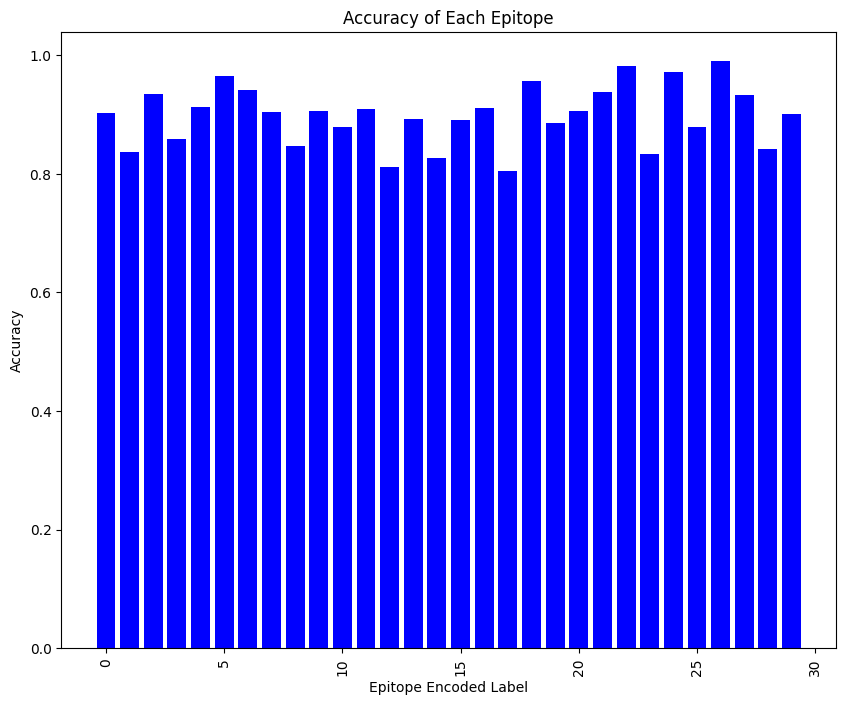

In [205]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# 加载处理后的数据集
df = pd.read_csv('CDR3_encoded_complete_fake5.csv')

# 找到所有独特的表位编码
unique_epitopes = df['epitope_encoded'].unique()

# 初始化结果收集列表
accuracy_results = []

# 遍历每一个独特的表位编码
for epitope_encoded in unique_epitopes:
    df_filtered = df[df['epitope_encoded'] == epitope_encoded]
    df_filtered['CDR3a_encoded'] = df_filtered['CDR3a_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
    df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))

    X = np.hstack((np.vstack(df_filtered['CDR3a_encoded'].values), np.vstack(df_filtered['CDR3b_encoded'].values)))
    y = df_filtered['binder'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 计算准确率并收集结果
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append((epitope_encoded, accuracy))

# 准备绘图
epitopes = [x[0] for x in accuracy_results]
accuracies = [x[1] for x in accuracy_results]

# 绘制柱状图
plt.figure(figsize=(10, 8))
plt.bar(epitopes, accuracies, color='blue')
plt.xlabel('Epitope Encoded Label')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Epitope')
plt.xticks(rotation=90)  # Rotate labels for better visibility if needed
plt.show()


In [212]:
df = pd.read_csv('/Users/lifangyi/Desktop/UOB/mini/VDJ_test_2.csv')
peptide_count = (df['peptide'] == 'KLGGALQAK').sum()
print(peptide_count)

0


In [21]:
###@231313123213123
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, average_precision_score
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support

# 加载原始数据集以获取epitope名称
df_original = pd.read_csv('/Users/lifangyi/Desktop/UOB/mini/data_clean_large.csv', sep='\t')

# 加载处理后的数据集
#df = pd.read_csv('updated_CDR3_encoded_complete_fake.csv')
df = pd.read_csv('CDR3_encoded_complete_fake_small_mhc.csv')

# 创建一个映射，将epitope编码映射回其原始名称
epitope_name_mapping = dict(zip(df['epitope_encoded'], df_original['antigen.epitope']))

# 找到所有独特的表位编码
unique_epitopes = df['epitope_encoded'].unique()
print(unique_epitopes)
# 遍历每一个独特的表位编码
for epitope_encoded in unique_epitopes:
    epitope_name = epitope_name_mapping.get(epitope_encoded, "Unknown Epitope")
    print(f"Results for {epitope_name} (Encoded value: {epitope_encoded})")

    # if epitope_name != "ATDALMTGF":
        # continue
    
    # 在处理过的数据集df中过滤出对应epitope_encoded的行
    df_filtered = df[df['epitope_encoded'] == epitope_encoded]

    # 处理数据：将编码序列从字符串转换为数值数组
    #df_filtered['CDR3a_encoded'] = df_filtered['CDR3a_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
    df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
    #df_filtered['cluster'] = df_filtered['cluster'].apply(lambda x:np.fromstring(x,dtype = int,sep = ''))
    # 添加MHC类 I 和类 II 的编码数据
    # df_filtered['mhc_a_encoded'] = df_filtered['mhc_a_encoded'].apply(int)
    # df_filtered['mhc_b_encoded'] = df_filtered['mhc_b_encoded'].apply(int)

    # 合并CDR3a, CDR3b, MHC类 I 和类 II 编码
    # X = np.hstack((
    #     np.vstack(df_filtered['CDR3a_encoded'].values),
    #     np.vstack(df_filtered['CDR3b_encoded'].values),
    #     #np.vstack(df_filtered['cluster'].values)
    #     # df_filtered['mhc_a_encoded'].values.reshape(-1, 1),
    #     # df_filtered['mhc_b_encoded'].values.reshape(-1, 1)
    # ))
    X = np.vstack(df_filtered['CDR3b_encoded'].values)
    # 定义目标变量
    y = df_filtered['binder'].values

    # 划分训练和测试数据集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 初始化XGBoost模型
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss',n_estimators = 120)
    print("真实: ", y_test)
    # 训练模型
    model.fit(X_train, y_train)
    # 预测测试集
    y_pred = model.predict(X_test)
    print("预测: ", y_pred)

    y_proba = model.predict_proba(X_test)[:, 1]  # 获取正类的预测概率用于ROC和平均精确度计算





    
    # 计算并打印各种评估指标
    accuracy = accuracy_score(y_test, y_pred)
    # f1 = f1_score(y_test, y_pred)
    precision, recall, f1, _  = precision_recall_fscore_support(y_test, y_pred,average='macro')
    try:
        roc_auc = roc_auc_score(y_test, y_proba)
    except ValueError as e:
        print(f"无法计算AUROC: {e}")
        roc_auc = None
    # roc_auc = roc_auc_score(y_test, y_proba)
    if roc_auc is not None:
        print(f"AUROC: {roc_auc}")

    # recall = recall_score(y_test, y_pred)
    try:
        average_precision = average_precision_score(y_test, y_proba)
    except ValueError as e:
        print(f"无法计算AUPRC: {e}")
        average_precision = None
    
    if average_precision is not None:
        print(f"average_precision: {average_precision}")

    # average_precision = average_precision_score(y_test, y_proba)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    #print(f"ROC AUC Score: {roc_auc:.2f}")
    print(f"Recall: {recall:.2f}")
    #print(f"Average Precision Score: {average_precision:.2f}")
    print(f"precision:{precision:.2f}")
    print("\n" + "-"*50 + "\n")
    


[ 9 10  5  4  8 22 23  1 21 27 29 19 26 16  6 25  3  0 28  2 15 11 20 13
 14 17 24 18 12  7]
Results for KLGGALQAK (Encoded value: 9)
真实:  [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0

/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/935639432.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


预测:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0

/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/935639432.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


真实:  [1 0 0 ... 0 0 0]
预测:  [0 0 0 ... 0 0 0]
AUROC: 0.8497724530693279
average_precision: 0.6632169901900774
Accuracy: 0.87
F1 Score: 0.63
Recall: 0.60
precision:0.92

--------------------------------------------------

Results for LLWNGPMAV (Encoded value: 5)


/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/935639432.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


真实:  [0 0 0 ... 0 0 1]
预测:  [1 0 0 ... 0 0 1]
AUROC: 0.8973903499588971
average_precision: 0.8525078108320335
Accuracy: 0.95
F1 Score: 0.91
Recall: 0.87
precision:0.96

--------------------------------------------------

Results for KLGGALQAK (Encoded value: 4)
真实:  [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0

/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/935639432.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/935639432.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvc

预测:  [0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
AUROC: 0.7573891625615764
average_precision: 0.5146812605308198
Accuracy: 0.82
F1 Score: 0.64
Recall: 0.62
precision:0.71

--------------------------------------------------

Results for GILGFVFTL (Encoded value: 22)
真实:  [0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0]
预测:  [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0]
AUROC: 0.89
average_precision: 0.8938679245283019
Accuracy: 0.97
F1 Score: 0.93
Recall: 0.93
precision:0.93

--------------------------------------------------

Results for KLGGALQAK (Encoded value: 23)
真实:  [1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 

/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/935639432.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/935639432.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


真实:  [1 0 0 ... 0 1 0]
预测:  [0 0 0 ... 0 0 0]
AUROC: 0.6329293207187654
average_precision: 0.2827804560259204
Accuracy: 0.83
F1 Score: 0.53
Recall: 0.53
precision:0.64

--------------------------------------------------

Results for KLGGALQAK (Encoded value: 21)
真实:  [0 0 1 ... 0 1 0]


/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/935639432.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


预测:  [0 0 0 ... 0 1 0]
AUROC: 0.8026067984986538
average_precision: 0.6818714695003626
Accuracy: 0.90
F1 Score: 0.79
Recall: 0.74
precision:0.88

--------------------------------------------------

Results for KLGGALQAK (Encoded value: 27)
真实:  [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 1]
预测:  [0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1
 1]
AUROC: 0.8571428571428571
average_precision: 0.7065853959864943
Accuracy: 0.84
F1 Score: 0.72
Recall: 0.74
precision:0.71

--------------------------------------------------

Results for KLGGALQAK (Encoded value: 29)
真实:  [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1

/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/935639432.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/935639432.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


预测:  [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0

/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/935639432.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/935639432.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


预测:  [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0
 0 0 0 0 0]
AUROC: 0

/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/935639432.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


预测:  [0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0

/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/935639432.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/935639432.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


预测:  [0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0]
AU

/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/935639432.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/935639432.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


预测:  [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 1 0 1 0 1 0]
AUROC: 0.7896512935883014
average_precision: 0.5860059513067702
Accuracy: 0.88
F1 Score: 0.76
Recall: 0.73
precision:0.82

--------------------------------------------------

Results for KLGGALQAK (Encoded value: 28)
真实:  [0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0
 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 

/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/935639432.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


预测:  [0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
AUROC: 0.648705461934625
average_precision: 0.3470153

/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/935639432.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/935639432.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


预测:  [0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1]
AUROC: 0.9202380952380953
average_precision: 0.7989898989898989
Accuracy: 0.91
F1 Score: 0.82
Recall: 0.81
precision:0.84

--------------------------------------------------

Results for TFEYVSQPFLMDLE (Encoded value: 11)
真实:  [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
预测:  [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1]
AUROC: 0.8601458601458601
average_precision: 0.7169401095

/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/935639432.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/935639432.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


预测:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0]
AUROC: 0.676420695504665
average_precision: 0.27833093233515166
Accuracy: 0.87
F1 Score: 0.61
Recall: 0.59
precision:0.65

--------------------------------------------------

Results for KLGGALQAK (Encoded value: 13)
真实:  [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 1 0 0 

/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/935639432.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/935639432.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


预测:  [0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0]
AUROC: 0.6960000000000001
average_precision: 0.39704312881948456
Accuracy: 0.85
F1 Score: 0.65
Recall: 0.62
precision:0.75

--------------------------------------------------

Results for KLGGALQAK (Encoded value: 17)
真实:  [1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0]
预测:  [0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0]
AUROC: 0.5950704225352113
average_precision: 0.3258880125042992
Accuracy: 0.75
F1 Score: 0.53
Recall: 0.5

/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/935639432.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/935639432.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvc

预测:  [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
AUROC: 0.5546218487394958
average_precision: 0.2868047610314171
Accuracy: 0.79
F1 Score: 0.54
Recall: 0.54
precision:0.57

--------------------------------------------------

Results for KLGGALQAK (Encoded value: 7)
真实:  [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
预测:  [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
AUROC: 0.9526748971193415
average_precision: 0.8395009855794171
Accuracy: 0.92
F1 Score: 0.83
Recall: 0.81
precision:0.85

--------------------------------------------------



/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/935639432.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, average_precision_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# 加载处理后的数据集
df = pd.read_csv('updated_CDR3_encoded_complete_fake.csv')

# 找到所有独特的表位编码
unique_epitopes = df['antigen.epitope'].unique()

# 准备收集每个表位的准确率数据
epitope_accuracies = []

# 遍历每一个独特的表位编码
for epitope_encoded in unique_epitopes:
    print(epitope_encoded)
    # 在处理过的数据集df中过滤出对应epitope_encoded的行
    df_filtered = df[df['antigen.epitope'] == epitope_encoded]

    # 处理数据：将编码序列从字符串转换为数值数组
    df_filtered['CDR3a_encoded'] = df_filtered['CDR3a_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
    df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))

    # 合并CDR3a, CDR3b, MHC类 I 和类 II 编码
    # X = np.hstack((
    #     np.vstack(df_filtered['CDR3a_encoded'].values),
    #     np.vstack(df_filtered['CDR3b_encoded'].values),
    #     np.vstack(df_filtered['cluster'].values)
    #     # df_filtered['mhc_a_encoded'].values.reshape(-1, 1),
    #     # df_filtered['mhc_b_encoded'].values.reshape(-1, 1)
    # ))
    X = np.vstack(df_filtered['CDR3b_encoded'].values)
    # 定义目标变量
    y = df_filtered['binder'].values

    # 划分训练和测试数据集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 初始化XGBoost模型
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss',n_estimators = 120)
    print("真实: ", y_test)
    # 训练模型
    model.fit(X_train, y_train)
    # 预测测试集
    y_pred = model.predict(X_test)
    print("预测: ", y_pred)

    y_proba = model.predict_proba(X_test)[:, 1]  # 获取正类的预测概率用于ROC和平均精确度计算
    
    # 计算并打印各种评估指标
    accuracy = accuracy_score(y_test, y_pred)
    # f1 = f1_score(y_test, y_pred)
    precision, recall, f1, _  = precision_recall_fscore_support(y_test, y_pred,average='macro')
    try:
        roc_auc = roc_auc_score(y_test, y_proba)
    except ValueError as e:
        print(f"无法计算AUROC: {e}")
        roc_auc = None
    # roc_auc = roc_auc_score(y_test, y_proba)
    if roc_auc is not None:
        print(f"AUROC: {roc_auc}")

    # recall = recall_score(y_test, y_pred)
    try:
        average_precision = average_precision_score(y_test, y_proba)
    except ValueError as e:
        print(f"无法计算AUPRC: {e}")
        average_precision = None
    
    if average_precision is not None:
        print(f"average_precision: {average_precision}")

    # average_precision = average_precision_score(y_test, y_proba)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    #print(f"ROC AUC Score: {roc_auc:.2f}")
    print(f"Recall: {recall:.2f}")
    #print(f"Average Precision Score: {average_precision:.2f}")
    print(f"precision:{precision:.2f}")
    print("\n" + "-"*50 + "\n")

# # 分离表位编码和准确率用于绘图
# epitope_labels, accuracies = zip(*epitope_accuracies)

# # 绘制柱状图
# plt.figure(figsize=(12, 6))
# plt.bar(epitope_labels, accuracies, color='blue')
# plt.xlabel('Epitope Encoded Value')
# plt.ylabel('Accuracy')
# plt.title('Accuracy for Each Epitope')
# plt.xticks(rotation=90)  # 如果标签太多可以旋转以便查看
# plt.show()


IVTDFSVIK
真实:  [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0

/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3a_encoded'] = df_filtered['CDR3a_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


预测:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0

/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3a_encoded'] = df_filtered['CDR3a_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


真实:  [1 0 0 ... 0 0 0]
预测:  [0 0 0 ... 0 0 0]
AUROC: 0.8497724530693279
average_precision: 0.6632169901900774
Accuracy: 0.87
F1 Score: 0.63
Recall: 0.60
precision:0.92

--------------------------------------------------

GILGFVFTL


/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3a_encoded'] = df_filtered['CDR3a_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


真实:  [0 0 0 ... 0 0 1]
预测:  [1 0 0 ... 0 0 1]
AUROC: 0.8973903499588971
average_precision: 0.8525078108320335
Accuracy: 0.95
F1 Score: 0.91
Recall: 0.87
precision:0.96

--------------------------------------------------

ELAGIGILTV
真实:  [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 

/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3a_encoded'] = df_filtered['CDR3a_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvc

预测:  [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
AUROC: 0.7540697674418604
average_precision: 0.

/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3a_encoded'] = df_filtered['CDR3a_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvc

真实:  [1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 0

/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3a_encoded'] = df_filtered['CDR3a_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


真实:  [1 0 0 ... 0 1 0]
预测:  [0 0 0 ... 0 0 0]
AUROC: 0.6329293207187654
average_precision: 0.2827804560259204
Accuracy: 0.83
F1 Score: 0.53
Recall: 0.53
precision:0.64

--------------------------------------------------

RAKFKQLL


/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3a_encoded'] = df_filtered['CDR3a_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


真实:  [0 0 1 ... 0 1 0]
预测:  [0 0 0 ... 0 1 0]
AUROC: 0.8026067984986538
average_precision: 0.6818714695003626
Accuracy: 0.90
F1 Score: 0.79
Recall: 0.74
precision:0.88

--------------------------------------------------

TPRVTGGGAM
真实:  [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 1]
预测:  [0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1
 1]
AUROC: 0.8571428571428571
average_precision: 0.7065853959864943
Accuracy: 0.84
F1 Score: 0.72
Recall: 0.74
precision:0.71

--------------------------------------------------

YLQPRTFLL


/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3a_encoded'] = df_filtered['CDR3a_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvc

真实:  [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0

/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3a_encoded'] = df_filtered['CDR3a_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvc

真实:  [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0
 0 0 0 0 0]
预测:  [0 

/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3a_encoded'] = df_filtered['CDR3a_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


真实:  [0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 1 1 0

/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3a_encoded'] = df_filtered['CDR3a_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvc

真实:  [0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1
 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0
 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0]
预测

/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3a_encoded'] = df_filtered['CDR3a_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvc

真实:  [0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0
 0 0 0 1 0 0 0]
预测:  [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 1 0 1 0 1 0]
AUROC: 0.7896512935883014
average_precision: 0.5860059513067702
Accuracy: 0.88
F1 Score: 0.76
Recall: 0.73
precision:0.82

--------------------------------------------------

TTDPSFLGRY
真实:  [0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 

/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3a_encoded'] = df_filtered['CDR3a_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvc

预测:  [0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1]
AUROC: 0.9202380952380953
average_precision: 0.7989898989898989
Accuracy: 0.91
F1 Score: 0.82
Recall: 0.81
precision:0.84

--------------------------------------------------

KSKRTPMGF
真实:  [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
预测:  [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1]
AUROC: 0.8601458601458601
average_precision: 0.7169401095136784
Accuracy: 0.92
F1 Score: 0.83


/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3a_encoded'] = df_filtered['CDR3a_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvc

真实:  [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0]
预测:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3a_encoded'] = df_filtered['CDR3a_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvc

预测:  [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
AUROC: 0.5546218487394958
average_precision: 0.2868047610314171
Accuracy: 0.79
F1 Score: 0.54
Recall: 0.54
precision:0.57

--------------------------------------------------

GPRLGVRAT
真实:  [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
预测:  [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
AUROC: 0.9526748971193415
average_precision: 0.8395009855794171
Accuracy: 0.92
F1 Score: 0.83
Recall: 0.81
precision:0.85

--------------------------------------------------



/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3a_encoded'] = df_filtered['CDR3a_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
/var/folders/0r/ls44gdn50fvcg415s39v_ww00000gn/T/ipykernel_25567/798799594.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CDR3b_encoded'] = df_filtered['CDR3b_encoded'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))


In [58]:
df = pd.read_csv('updated_CDR3_encoded_complete_fake.csv')
df_check2 = pd.read_csv('CDR3_encoded_complete_fake_small_mhc.csv')
df_checked = df[df['antigen.epitope'] == 'KLGGALQAK']

In [59]:
print(len(df_checked))
print(len(df_check2))

82170
147738


In [45]:
###多标签one-hot，注意，这个才是真正聚合了相同cdr3序列后更改了数据集中的epitope的！！！！！！！！！
###xgboost
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from xgboost import plot_tree

import os
# 将Graphviz的bin目录添加到PATH
import os
# 将Graphviz的bin目录添加到PATH
import os
# 将Graphviz的bin目录添加到PATH
os.environ["PATH"] += os.pathsep + '/opt/homebrew/bin'


# 加载重新编码后的数据
encoded_df = pd.read_csv('CDR3_encoded_complete_final_musmus.csv')

# 确保每个值都是字符串，并尝试分割字符串
encoded_df['epitope_encoded'] = encoded_df['epitope_encoded'].astype(str).apply(lambda x: x.split(','))

# 聚合相同cdr3序列的所有epitope及保持基因编码
aggregated_data = encoded_df.groupby(['CDR3a_encoded', 'CDR3b_encoded']).agg({
    'epitope_encoded': lambda x: list(set([item for sublist in x for item in sublist]))
    # 'v_b_gene_encoded': 'first',
    # 'j_b_gene_encoded': 'first',
    # 'v_a_gene_encoded': 'first',
    # 'j_a_gene_encoded': 'first'
}).reset_index()
print(len(aggregated_data))
print(aggregated_data['epitope_encoded']
# cdr3_a_aa 和 cdr3_b_aa 的 one-hot 编码转换回 numpy 数组
cdr3_a_encoded = np.array([np.fromstring(seq, dtype=int, sep=' ') for seq in aggregated_data['CDR3a_encoded']])


cdr3_b_encoded = np.array([np.fromstring(seq, dtype=int, sep=' ') for seq in aggregated_data['CDR3b_encoded']])

# # V 和 J 基因的整数编码可以直接使用
# v_b_gene_encoded = aggregated_data['v_b_gene_encoded'].values
# j_b_gene_encoded = aggregated_data['j_b_gene_encoded'].values
# v_a_gene_encoded = aggregated_data['v_a_gene_encoded'].values
# j_a_gene_encoded = aggregated_data['j_a_gene_encoded'].values

# 多标签格式转换
mlb = MultiLabelBinarizer()
epitope_encoded = mlb.fit_transform(aggregated_data['epitope_encoded'])

# 将所有特征合并为一个特征矩阵
#X = np.hstack((cdr3_a_encoded, cdr3_b_encoded,
               #v_b_gene_encoded.reshape(-1, 1), j_b_gene_encoded.reshape(-1, 1),
               #v_a_gene_encoded.reshape(-1, 1), j_a_gene_encoded.reshape(-1, 1))
 #             ))

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(cdr3_b_encoded, epitope_encoded, test_size=0.2, random_state=42)

# 创建一个多标签分类器
xgb = OneVsRestClassifier(XGBClassifier(random_state=42))

# 训练模型
xgb.fit(X_train, y_train)

# 预测测试集
y_pred = xgb.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(y_pred[0])
print(y_test[0])


# xgb_classifier = xgb.estimators_[0]



811
0      [13]
1       [2]
2      [15]
3      [12]
4       [7]
       ... 
806     [6]
807    [12]
808    [12]
809    [12]
810     [4]
Name: epitope_encoded, Length: 811, dtype: object
Accuracy: 49.69%
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [40]:
print(len(encoded_df))

1111


In [46]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred,average='macro')
print(f'f1:{f1 * 100:.2f}%')

f1:25.09%


/Users/lifangyi/anaconda3/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
from sklearn.metrics import precision_score
precision = precision_score(y_test,y_pred,average = 'macro')
print(precision)

0.29346884999058914


/Users/lifangyi/anaconda3/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
